# Ejercicios de algoritmos de Agrupación.

In [1]:
# importamos las librerías:

#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importamos los datos:

df_F_TLD = pd.read_csv("Publicacions Facebook Thailandia.csv")

# Visualizar datos del dataframe:

In [3]:
# Primeras 5 líneas:
# ==============================================================================
df_F_TLD.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
# Últimas 5 líneas:
# ==============================================================================
df_F_TLD.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
# Muestra aleatoria:
# ==============================================================================
df_F_TLD.sample(4)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
5534,614855718638584_709599259164229,video,1/21/2018 1:08,257,1096,206,143,110,0,2,0,2,NaN,NaN,NaN,NaN
6386,1050855161656896_1591168350958905,video,4/8/2018 8:47,154,1138,408,128,25,1,0,0,0,NaN,NaN,NaN,NaN
421,246675545449582_1165505946899866,video,1/10/2017 1:40,256,103,16,205,47,1,2,0,1,NaN,NaN,NaN,NaN
4511,725980084255106_868896829963430,video,5/24/2018 6:22,1585,1913,628,1306,264,6,4,1,4,NaN,NaN,NaN,NaN


In [6]:
# Tamaño del dataframe:
# ==============================================================================
df_F_TLD.shape

(7050, 16)

Podemos ver que hay 7050 instancias y 16 atributos en el conjunto de datos. En la descripción del conjunto de datos, se indica que hay 7051 instancias y 12 atributos en el conjunto de datos.

Entonces, podemos inferir que la primera instancia es el encabezado de la fila y hay 4 atributos adicionales en el conjunto de datos. A continuación, debemos echar un vistazo al conjunto de datos para obtener más información al respecto.

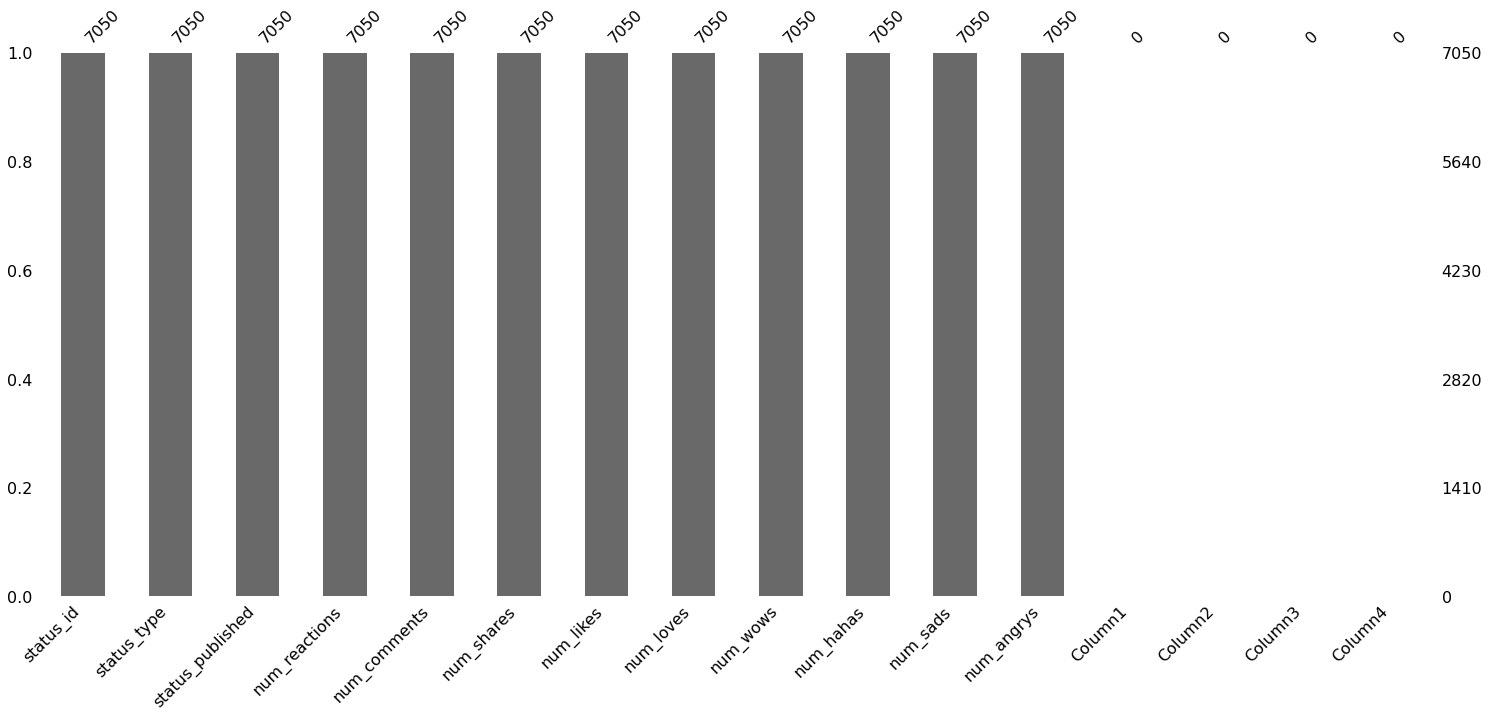

In [7]:
#Visualizar cantidad de datos por columna:
# ==============================================================================
msno.bar(df_F_TLD);

* En la gráfica anterior se logra observar que los atributos 'Column1', 'Column2', 'Column3' y 'Column4' no existen observaciones.

# Análisis exploratorio de datos

In [8]:
# Valores nulos por columna:
# ==============================================================================
df_F_TLD.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Podemos ver que hay 4 columnas redundantes en el conjunto de datos. Vamos a eliminarlas para seguir adelante.

In [9]:
# eliminamos las columnas vacías:
# ==============================================================================
df_F_TLD = df_F_TLD.drop(['Column1', 'Column2', 'Column3','Column4'], axis=1)
df_F_TLD.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [10]:
# Registros vacios por columna:
# ==============================================================================
df_F_TLD.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [11]:
# General:
# ==============================================================================
df_F_TLD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Nuestro dataset recoge el comportamiento de los usuarios de Facebook en Tailandia entre los años 2012 y 2018. Es una base de datos estructurada relacional con  7050 registros y doce atributos. 


Podemos ver que hay 3 variables categóricas, de las cuales una es ordinal y otra temporal (tipo de datos = objeto) y las 9 variables numéricas restantes (tipo de datos = int64).

# Transformación del Dataframe

### Descripción de Atributos categóricas:


Antes de continuar con el Análisis exploratorio, vamos a analizar cada uno de los atributos categóricos para ver si podemos sacar más información y poder aplicar algunas transformaciones.

In [12]:
# Variables cualitativas (tipo object)
# ==============================================================================
df_F_TLD.select_dtypes(include=['object']).describe()

,status_id,status_type,status_published
count,7050,7050,7050
unique,6997,4,6913
top,819700534875473_957599447752247,photo,3/20/2018 1:54
freq,2,4288,3


* Para **status_id** podemos observar 6997 datos únicos, lo cual significa que tenemos 53 registros duplicados.

* El tipo de formato que aparece más veces en el top es **photo	**.

* La variable **status_type** es categórica.

### Explore la variable status_published

In [13]:
# ver las etiquetas en la variable:
# ==============================================================================
df_F_TLD['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

Podemos ver que hay 6913 etiquetas únicas en la variable status_published. El número total de instancias en el conjunto de datos es 7050. Por lo consiguiente, también es aproximadamente un identificador único para cada una de las instancias. Por lo tanto, Tenemos una variable categórica de la que podemos obtener variables temporales que nos aportarían información para el analisis como los meses, los años, las horas, con las que etiquetar partes del día, estaciones del año, eventos puntuales, etc...

### Explore la variable status_type

In [14]:
# ver las etiquetas en la variable:
# ==============================================================================
df_F_TLD['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Podemos ver que hay 4 categorías de etiquetas en la variable status_type. Este será el atributo objetivo.

Pasamos esta variable categórica a numérica categórica.

## Data Quality

Encontramos los siguientes problemas de calidad de datos y la solución apropiada implementada para continuar.

1. **status_published:** Vamos a separar los meses, los años, las horas, con las que etiquetar partes del día, estaciones del año, eventos puntuales, etc...

2. **status_type:** Pasamos esta variable categórica a numérica categórica.

# Variable temporal 'status_published'

In [15]:
from datetime import datetime

df_F_TLD['publication_date'] = [None] * len(df_F_TLD['status_published'])

for i in range(len(df_F_TLD['status_published'])):
    df_F_TLD['publication_date'][i] = datetime.strptime(df_F_TLD['status_published'][i], '%m/%d/%Y %H:%M')

In [16]:
df_F_TLD['year'] = [None] * len(df_F_TLD['status_published'])
df_F_TLD['month'] = [None] * len(df_F_TLD['status_published'])
df_F_TLD['hour'] = [None] * len(df_F_TLD['status_published'])
for i in range(len(df_F_TLD['status_published'])):
    date = df_F_TLD['publication_date'][i]
    df_F_TLD['year'][i] = date.strftime('%Y')
    df_F_TLD['month'][i] = date.strftime('%m')
    df_F_TLD['hour'][i] = date.strftime('%H:%M')

In [17]:
# eliminamos la variable original
# ==============================================================================
df_F_TLD = df_F_TLD.drop('status_published', axis=1)

## Variable temporal 'hour', partes del día.

Transformamos las horas en una variable numérica categórica: mañana, tarde, noche, madrugada. En Tailandia amanece muy pronto (6.00 - 6.30) y oscurece también muy pronto (18.00 - 18.30), suelen comer y cenar en horario europeo (12.30 / 19.00, más o menos), nos guiamos por estos datos para configurar las partes del día.

In [18]:
# añadimos una variable al dataset
df_F_TLD['part_day'] = 'Manaña 06-12h'
# filtramos por horas y damos valores
df_F_TLD.loc[(df_F_TLD['hour']>= '00:00') & (df_F_TLD['hour']< '06:00'), 'part_day'] = 'Madrugada 00-06h'
df_F_TLD.loc[(df_F_TLD['hour']>= '12:00') & (df_F_TLD['hour']< '20:00'), 'part_day'] = 'Tarde 12-20h'
df_F_TLD.loc[(df_F_TLD['hour']>= '20:00') & (df_F_TLD['hour']< '23:59'), 'part_day'] = 'Noche 20-00h'

In [19]:
df_F_TLD['part_day'].value_counts()

Madrugada 00-06h    2998
Manaña 06-12h       2782
Noche 20-00h        1068
Tarde 12-20h         202
Name: part_day, dtype: int64

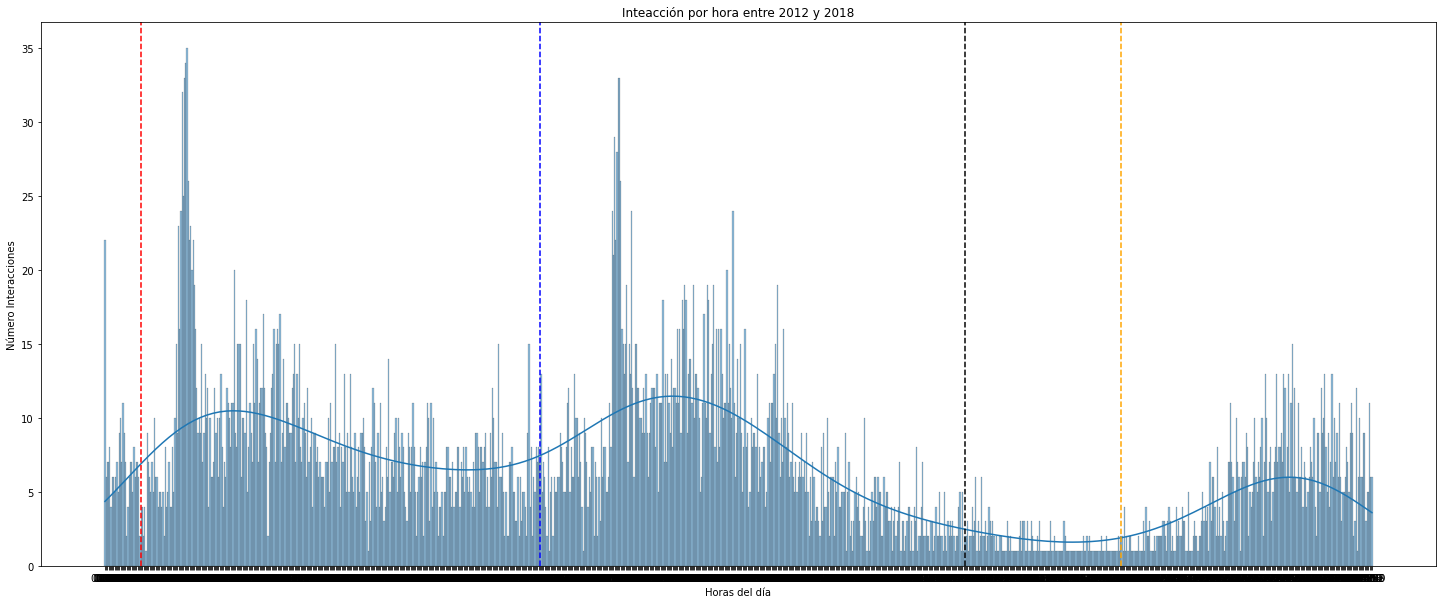

In [20]:
df_F_TLD = df_F_TLD.sort_values(by=['hour'])

fig, ax = plt.subplots(figsize=(25, 10))
sns.histplot(df_F_TLD['hour'], kde=True)
plt.axvline(x = '00:30', color = 'red', linestyle = '--')
plt.axvline(x = '06:00', color = 'blue', linestyle = '--')
plt.axvline(x = '12:00', color = 'black', linestyle = '--')
plt.axvline(x = '20:00', color = 'orange', linestyle = '--')
plt.xlabel('Horas del día')
plt.ylabel('Número Interacciones')
plt.title('Inteacción por hora entre 2012 y 2018');

Podemos observar que los usuarios están muy activos durante la madrugada, seis horas, y la mañana, seis horas. Durante las cuatro horas del periodo de noche interaccionan la mitad, y a lo largo de la tarde, ocho horas, apenas interaccionan.

In [21]:
# transformamos a una variable dummie
# ==============================================================================
df_F_TLD['part_day_dum'] = df_F_TLD['part_day'].map({'Manaña 06-12h':0, 'Tarde 12-20h':1, 'Noche 20-00h':2, 'Madrugada 00-06h':3})

# Variable 'status_type' , tipo de interacción con la red.

Pasamos esta variable categórica a numérica categórica.

In [22]:
df_F_TLD['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [23]:
df_F_TLD['status_type_dum'] = df_F_TLD['status_type'].map({'video':0, 'photo':1, 'status':2, 'link':3})

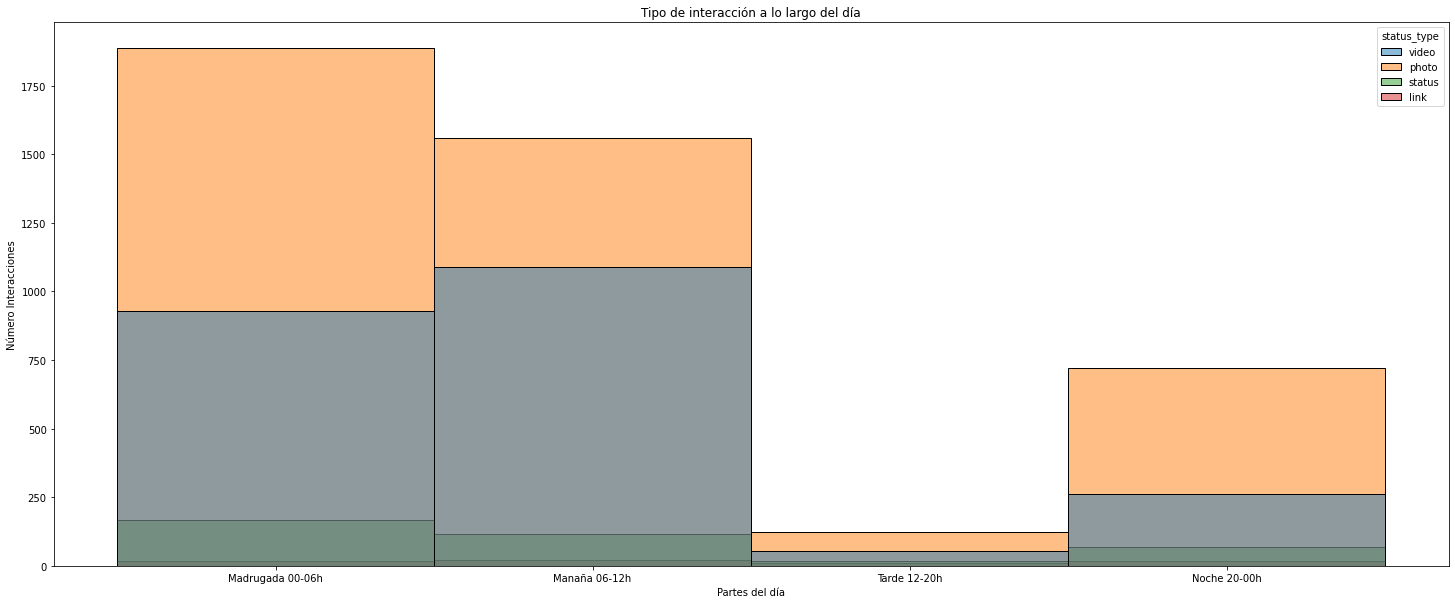

In [24]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.histplot(x=df_F_TLD['part_day'], hue=df_F_TLD['status_type'])
plt.xlabel('Partes del día')
plt.ylabel('Número Interacciones')
plt.title('Tipo de interacción a lo largo del día');

Los usuarios interaccionan principalmente con fotos y vídeos, siendo las fotos casi el doble que los vídeos. No llega al 10% los ususarios que comparten su estatus, y el número de links compartidos no llega al 1%.

# Preparación del dataset.

In [25]:
df_F_TLD.columns

Index(['status_id', 'status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'publication_date', 'year', 'month', 'hour',
       'part_day', 'part_day_dum', 'status_type_dum'],
      dtype='object')

In [26]:
# reordenamos las columnas
df_F_TLD = df_F_TLD.reindex(columns=['status_type', 'status_type_dum', 'part_day',
       'part_day_dum', 'publication_date',
       'month', 'year', 'hour', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys','status_id'])

In [27]:
# ordenamos por fecha
df_F_TLD = df_F_TLD.sort_values(by=['publication_date']).reset_index(drop=True, inplace=False)
df_F_TLD.head()

,status_type,status_type_dum,part_day,part_day_dum,publication_date,month,year,hour,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_id
0,photo,1,Madrugada 00-06h,3,2012-07-15 02:51:00,07,2012,02:51,15,3,0,15,0,0,0,0,0,246675545449582_246677465449390
1,photo,1,Madrugada 00-06h,3,2012-07-15 02:58:00,07,2012,02:58,14,7,0,14,0,0,0,0,0,246675545449582_246678538782616
2,photo,1,Madrugada 00-06h,3,2012-07-15 03:32:00,07,2012,03:32,14,1,0,14,0,0,0,0,0,246675545449582_246684432115360
3,photo,1,Madrugada 00-06h,3,2012-07-15 03:42:00,07,2012,03:42,12,3,0,12,0,0,0,0,0,246675545449582_246686478781822
4,photo,1,Madrugada 00-06h,3,2012-07-15 03:54:00,07,2012,03:54,19,17,3,19,0,0,0,0,0,246675545449582_246688625448274


# Continuar con el Análisis Exploratorio de Datos

-> Una vez transformado aplicando reglas de **data quality** y prepararación del dataframe, continuamos con el Análisis Exploratorio.

In [28]:
df_F_TLD.shape

(7050, 18)

In [29]:
df_F_TLD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_type_dum   7050 non-null   int64 
 2   part_day          7050 non-null   object
 3   part_day_dum      7050 non-null   int64 
 4   publication_date  7050 non-null   object
 5   month             7050 non-null   object
 6   year              7050 non-null   object
 7   hour              7050 non-null   object
 8   num_reactions     7050 non-null   int64 
 9   num_comments      7050 non-null   int64 
 10  num_shares        7050 non-null   int64 
 11  num_likes         7050 non-null   int64 
 12  num_loves         7050 non-null   int64 
 13  num_wows          7050 non-null   int64 
 14  num_hahas         7050 non-null   int64 
 15  num_sads          7050 non-null   int64 
 16  num_angrys        7050 non-null   int64 
 17  status_id     

In [30]:
# Verificar si existen datos duplicados:
# ==============================================================================
df_F_TLD[df_F_TLD.duplicated()]

,status_type,status_type_dum,part_day,part_day_dum,publication_date,month,year,hour,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_id
5365,photo,1,Madrugada 00-06h,3,2018-03-16 01:57:00,03,2018,01:57,985,71,42,962,5,16,2,0,0,819700534875473_951614605017398
5407,photo,1,Madrugada 00-06h,3,2018-03-18 04:28:00,03,2018,04:28,1985,39,21,1961,11,12,0,1,0,819700534875473_953048221540703
5431,photo,1,Madrugada 00-06h,3,2018-03-20 01:54:00,03,2018,01:54,186,15,1,172,3,11,0,0,0,819700534875473_954387151406810
5450,photo,1,Madrugada 00-06h,3,2018-03-21 01:15:00,03,2018,01:15,114,6,1,108,3,3,0,0,0,819700534875473_955149101330615
5468,photo,1,Madrugada 00-06h,3,2018-03-22 03:48:00,03,2018,03:48,879,165,18,867,4,8,0,0,0,819700534875473_955743124604546
5473,photo,1,Manaña 06-12h,0,2018-03-22 06:10:00,03,2018,06:10,1168,104,49,1133,17,17,1,0,0,819700534875473_955793427932849
5499,photo,1,Tarde 12-20h,1,2018-03-23 15:53:00,03,2018,15:53,547,71,7,535,6,6,0,0,0,819700534875473_956769714501887
5514,photo,1,Noche 20-00h,2,2018-03-24 23:51:00,03,2018,23:51,157,16,3,145,1,11,0,0,0,819700534875473_957599447752247
5529,photo,1,Madrugada 00-06h,3,2018-03-25 04:43:00,03,2018,04:43,488,20,8,484,4,0,0,0,0,819700534875473_957697307742461
5543,photo,1,Madrugada 00-06h,3,2018-03-26 01:57:00,03,2018,01:57,86,5,3,80,2,4,0,0,0,819700534875473_958291217683070


In [31]:
# Identificar registros duplicados:
# ==============================================================================
df_F_TLD.duplicated().sum()  

51

In [32]:
# Identificar columnas duplicadas:
duplicates = []
for col in range(df_F_TLD.shape[1]):
    contents = df_F_TLD.iloc[:, col]
    
    for comp in range(col + 1, df_F_TLD.shape[1]):
        if contents.equals(df_F_TLD.iloc[:, comp]):
            duplicates.append(comp)
duplicates = np.unique(duplicates).tolist()
print(duplicates)

[]


Ahora, podemos ver que las columnas redundantes se han eliminado del conjunto de datos.

In [33]:
# Resumen Estadístico de variables numéricas:
# ==============================================================================
df_F_TLD.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
status_type_dum,7050.0,0.74,0.59,0.0,0.0,1.0,1.00,3.0
part_day_dum,7050.0,1.61,1.37,0.0,0.0,2.0,3.00,3.0
num_reactions,7050.0,230.12,462.63,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.36,889.64,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.02,131.60,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.04,449.47,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.73,39.97,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.29,8.72,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.70,3.96,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.24,1.60,0.0,0.0,0.0,0.00,51.0


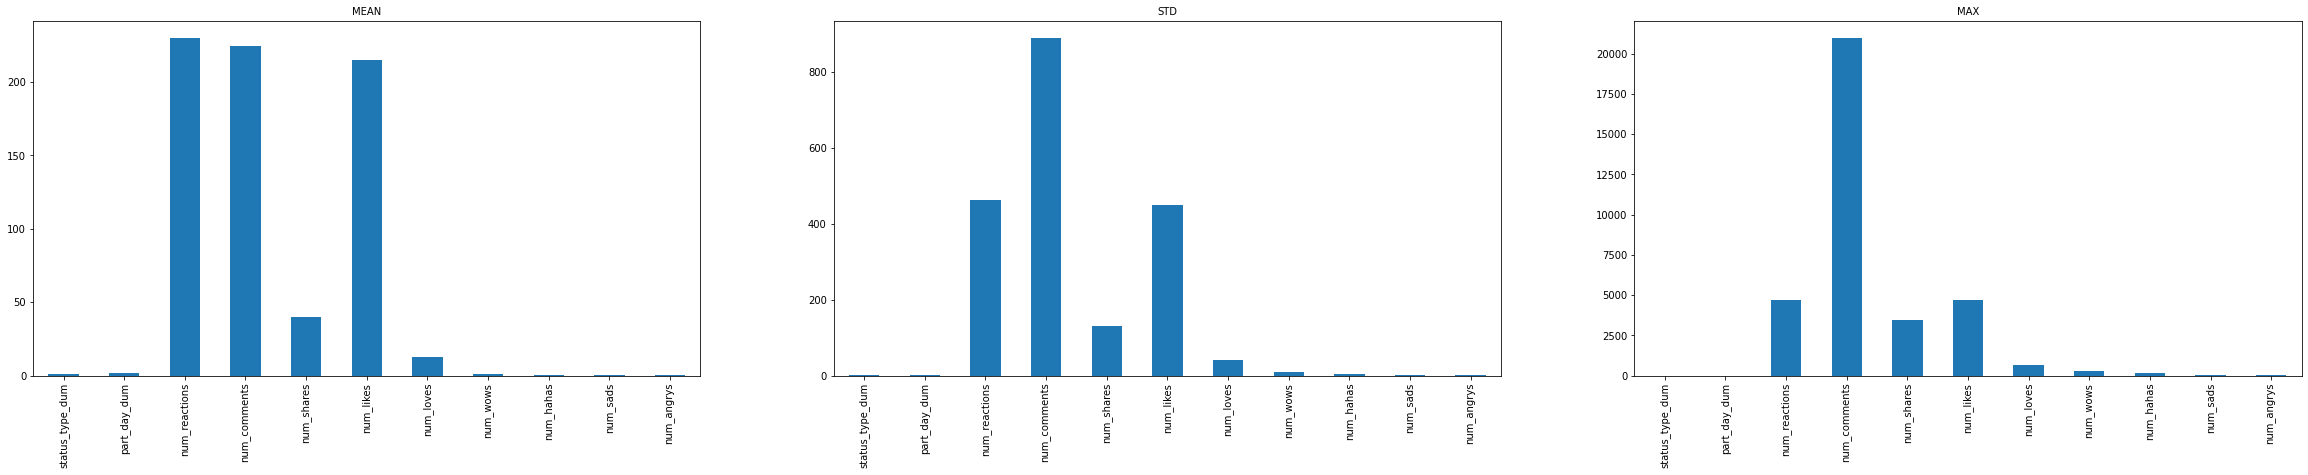

In [34]:
# Trazar la media y el valor máximo de los atributos nùmericos:
# ==============================================================================
data_desc = df_F_TLD.describe().round(2)

plt.figure(figsize=(55,30))
plt.subplot(4,4,1)
data_desc.loc['mean'].plot.bar()
plt.title('MEAN', fontsize = 10);

plt.subplot(4,4,2)
data_desc.loc['std'].plot.bar()
plt.title('STD', fontsize = 10);

plt.subplot(4,4,3)
data_desc.loc['max'].plot.bar()
plt.title('MAX', fontsize = 10);

# Visualizaciones

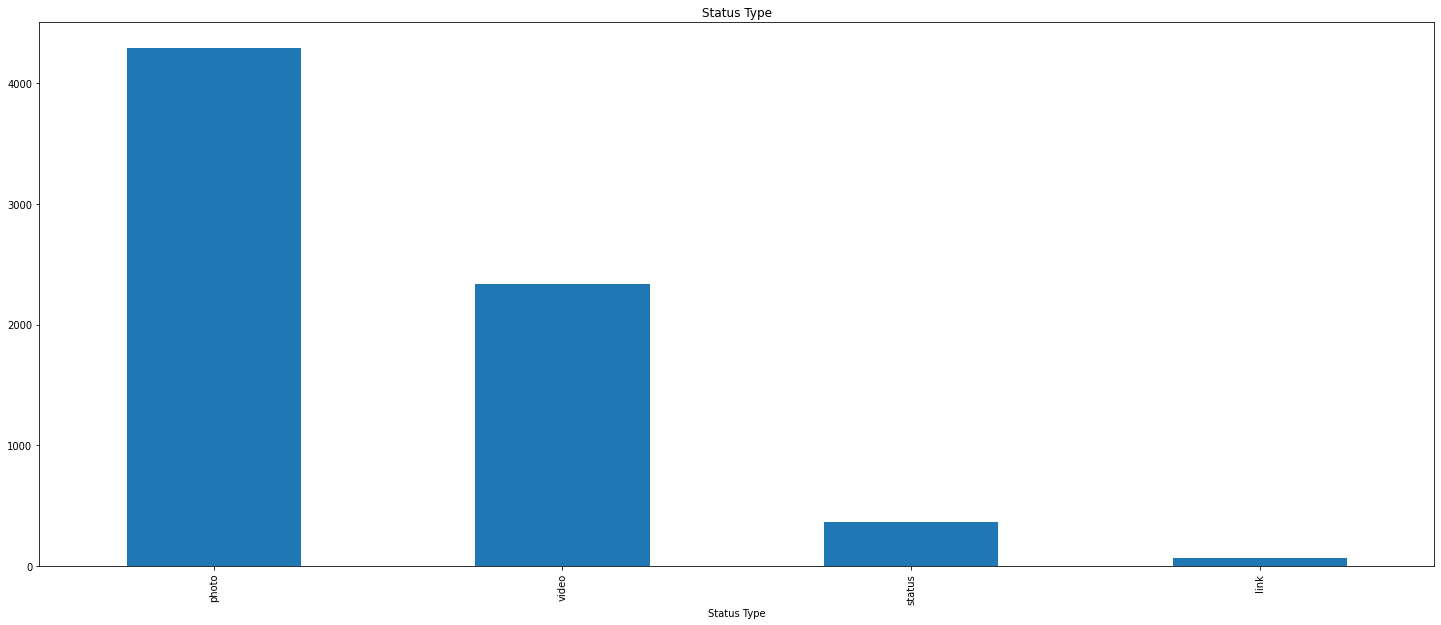

In [35]:
# Contando el número de valores pertenecientes a 'Status Type':
# ==============================================================================
df_F_TLD['status_type'].value_counts().plot(kind='bar',figsize=(25,10),title="Status Type")

plt.xlabel('Status Type');

La mayoría de los vendedores parecen estar usando una foto o un video como estado para la venta. Una pequeña parte de los usuarios depende del estado del texto o de la URL/enlace para publicar un anuncio.

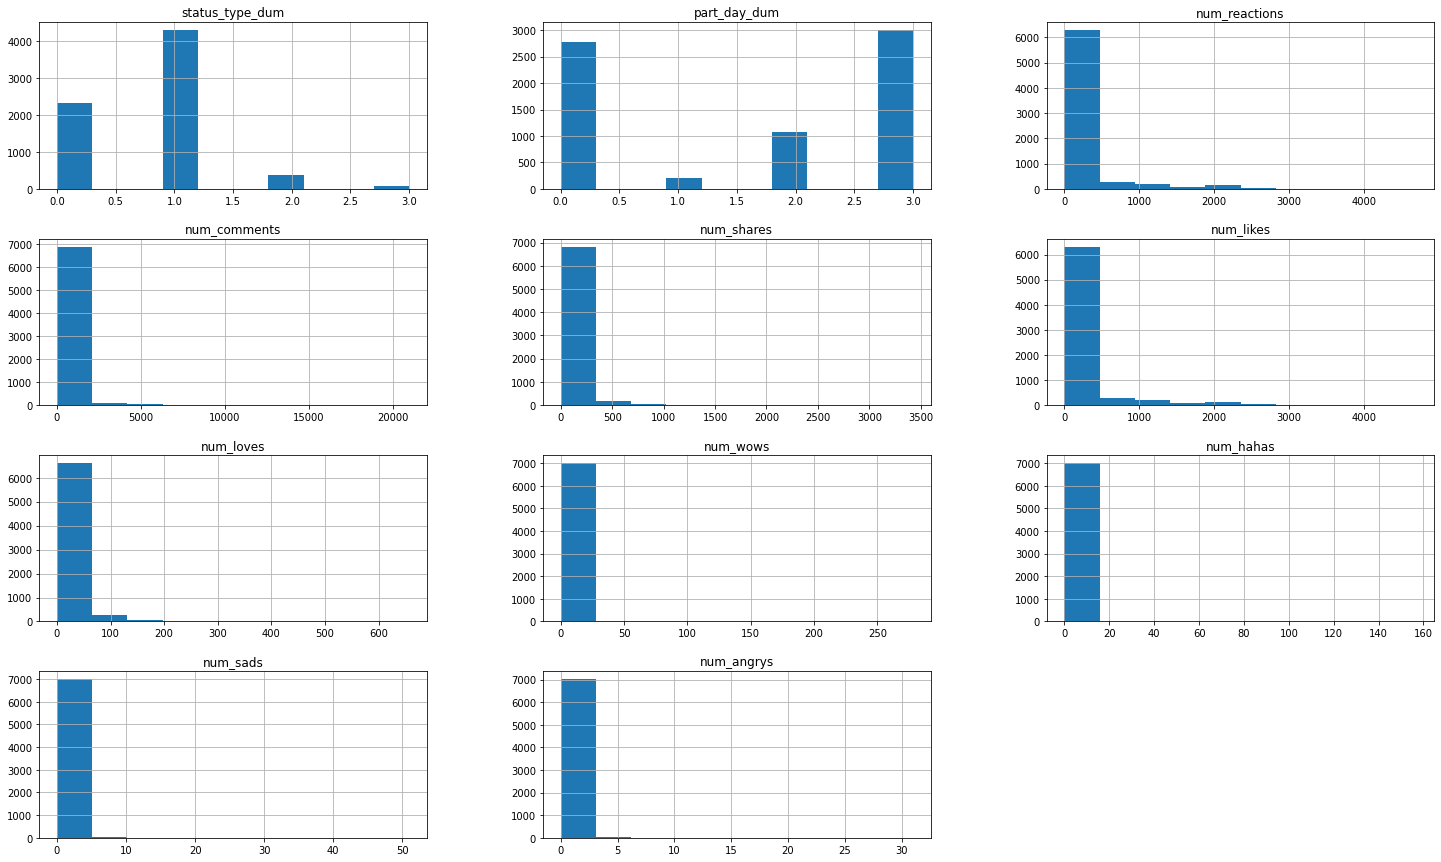

In [36]:
# Comprender dónde se alinean la mayoría de los valores:
# ==============================================================================
df_F_TLD.hist(figsize= (25,15));

Mirando los histogramas, vemos claramente que la mayoria de ellos exhibe una distribución normal estándar.

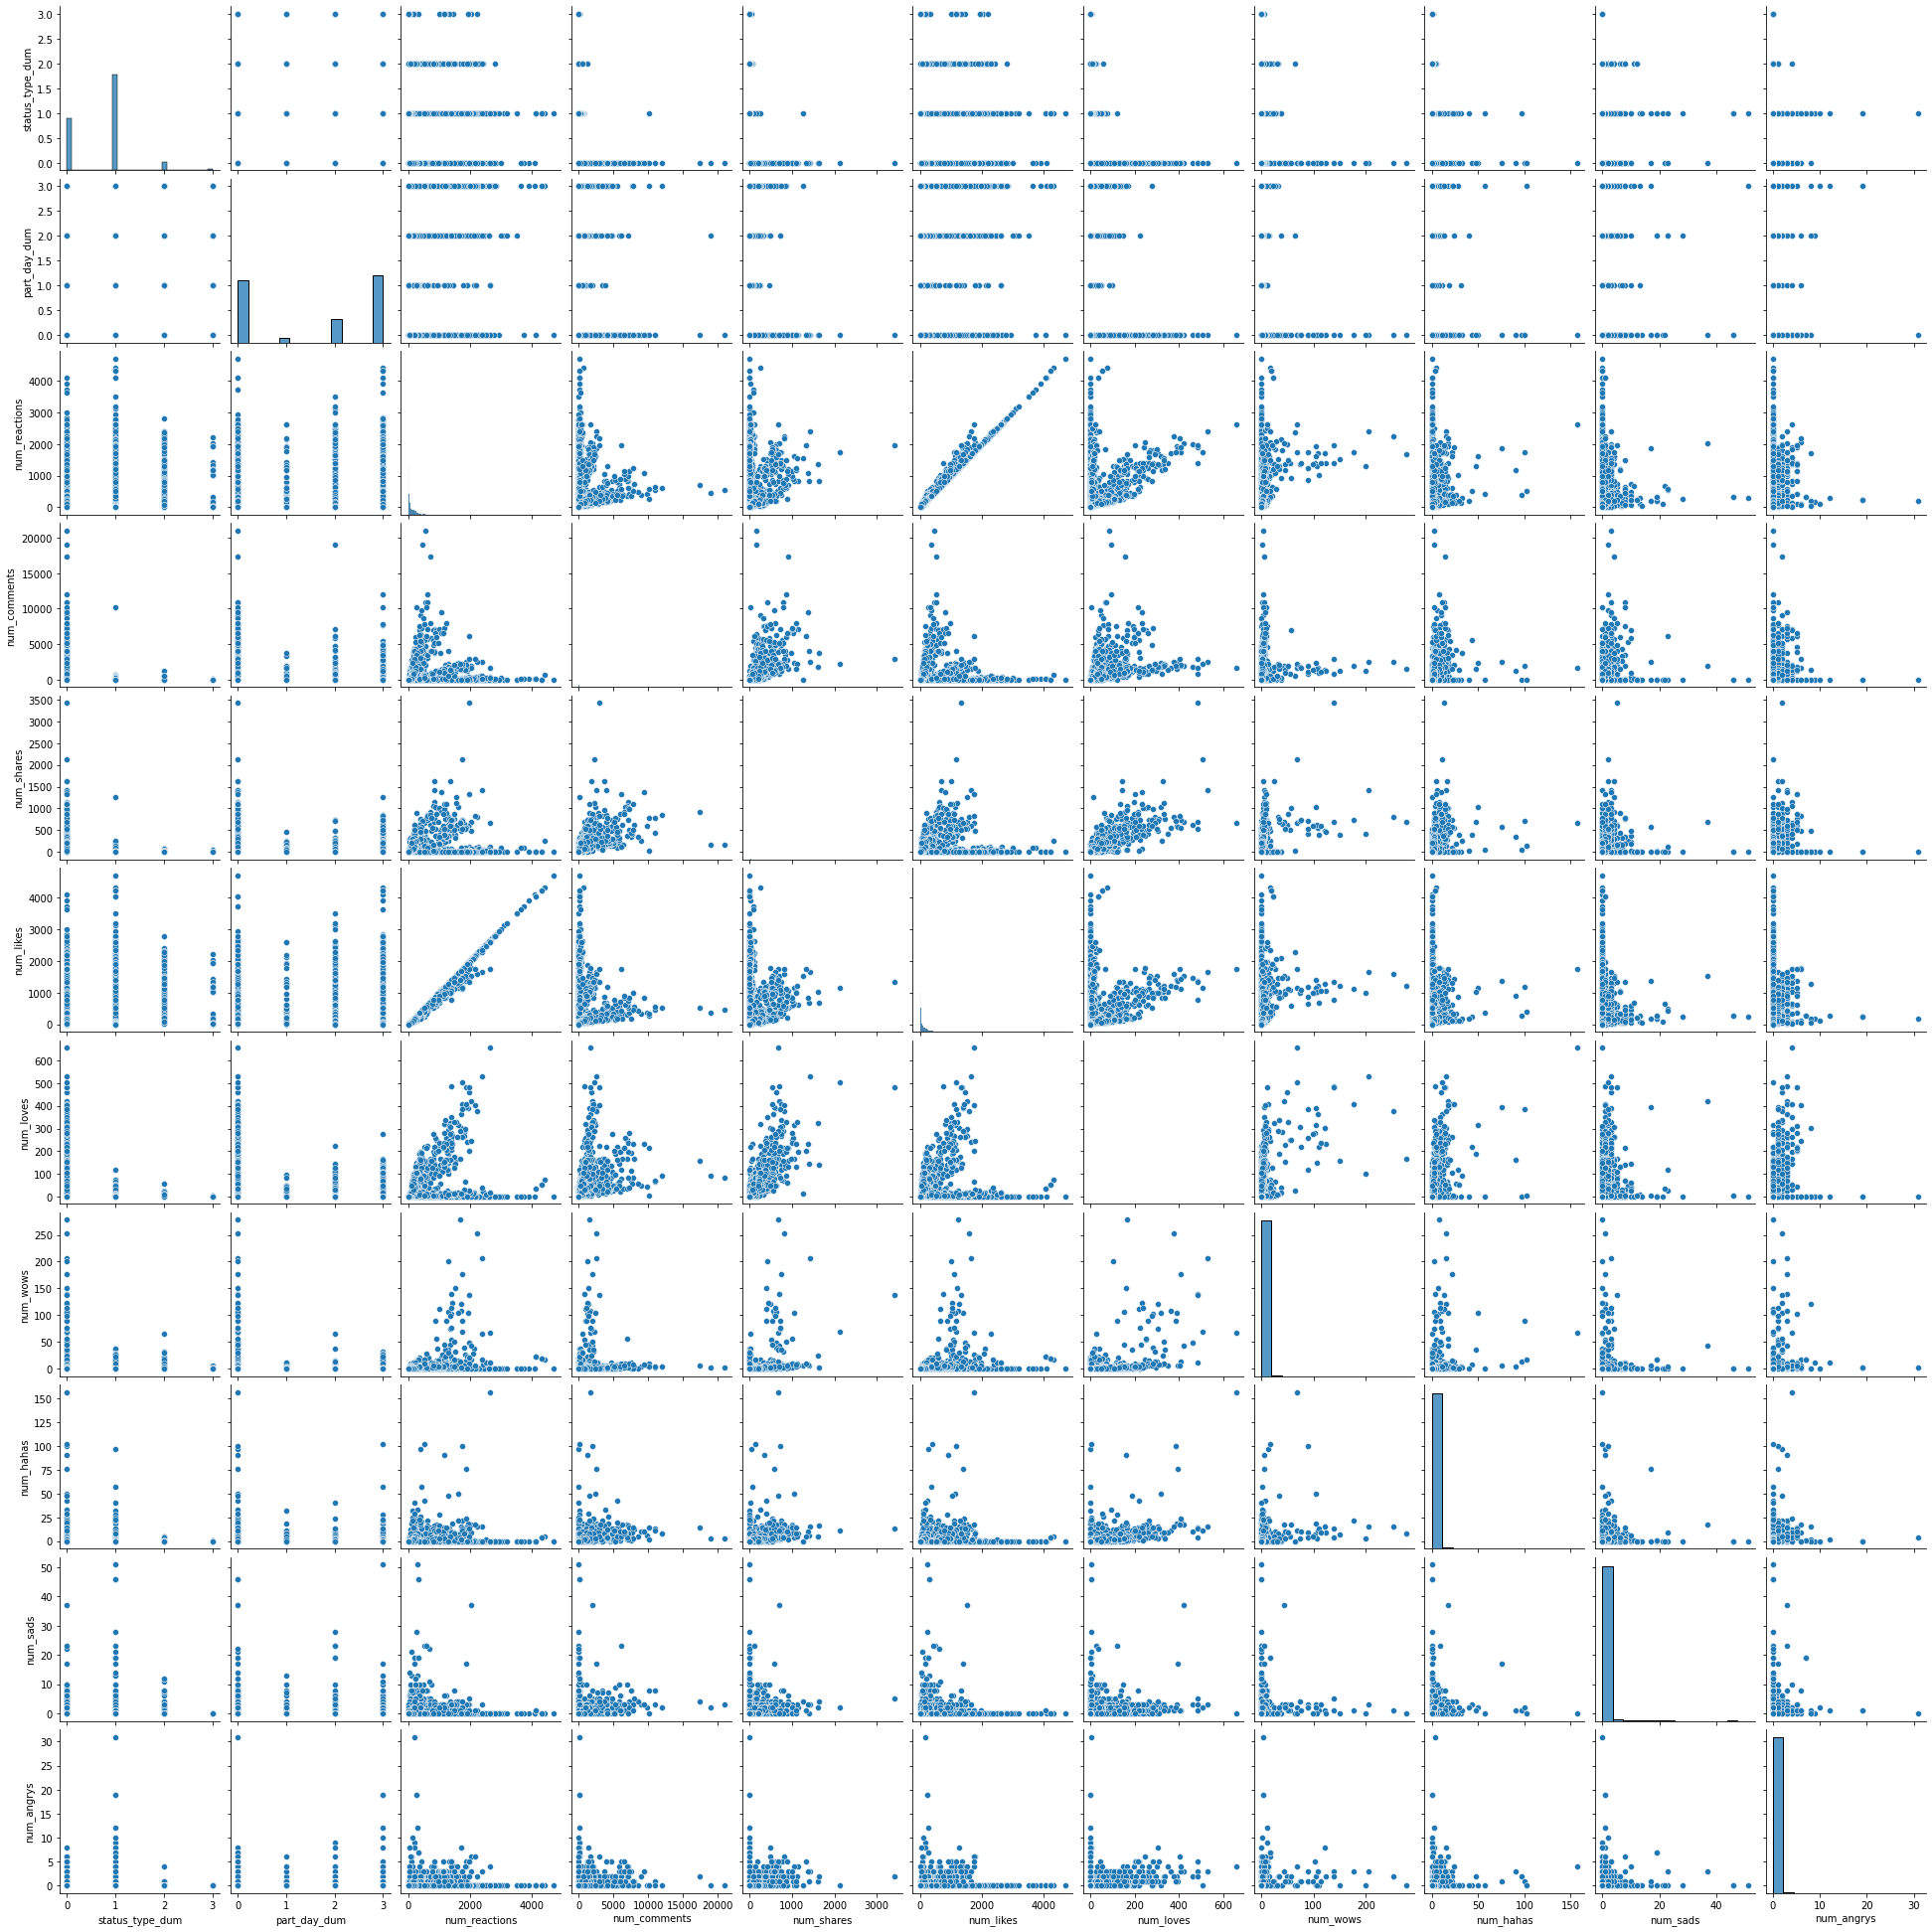

In [37]:
sns.pairplot(df_F_TLD)

Vemos que las desviaciones estandart de las variables son altas o muy altas, lo que significa que las distribuciones están muy sesgadas y que tienen outliers. Entendemos que son datos acordes a un comportamiento en una red social donde podemos encontrar reacciones virales que se reflejan así en las estadísticas.
Las gráficas muestran relaciones lineales entre variables que deberemos controlar.

In [38]:
# Extraer los Atributos Númericos:
# ==============================================================================
seleccion_númericas = df_F_TLD.select_dtypes(include = ["number"])
seleccion_númericas.head()

,status_type_dum,part_day_dum,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,15,3,0,15,0,0,0,0,0
1,1,3,14,7,0,14,0,0,0,0,0
2,1,3,14,1,0,14,0,0,0,0,0
3,1,3,12,3,0,12,0,0,0,0,0
4,1,3,19,17,3,19,0,0,0,0,0


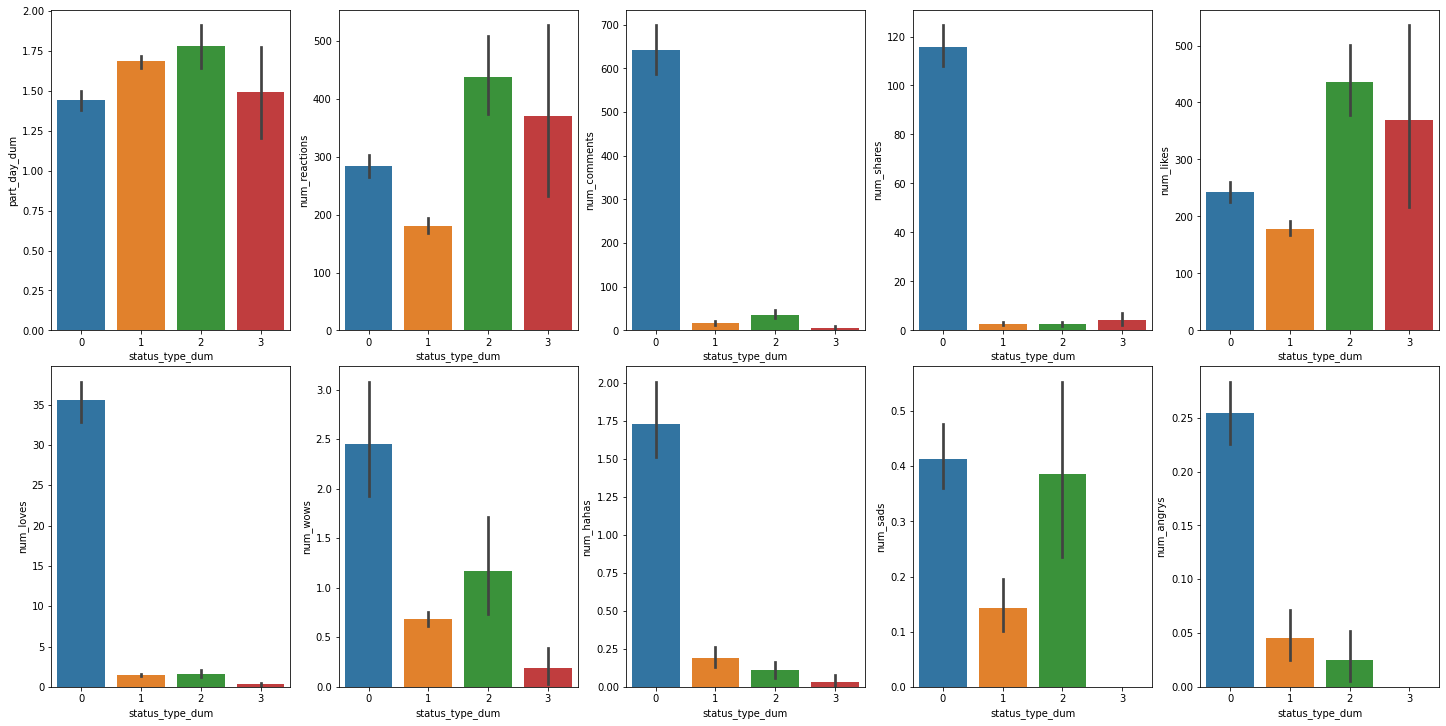

In [39]:
# Trazado de gráficos de barras para ver la relación entre cada función independiente con la función dependiente 'status_type_dum'
# ==============================================================================
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
ax = ax.flatten()
index=0
for i in seleccion_númericas.columns:
  if i != 'status_type_dum':
    sns.barplot(x='status_type_dum', y=i, data= seleccion_númericas, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show;

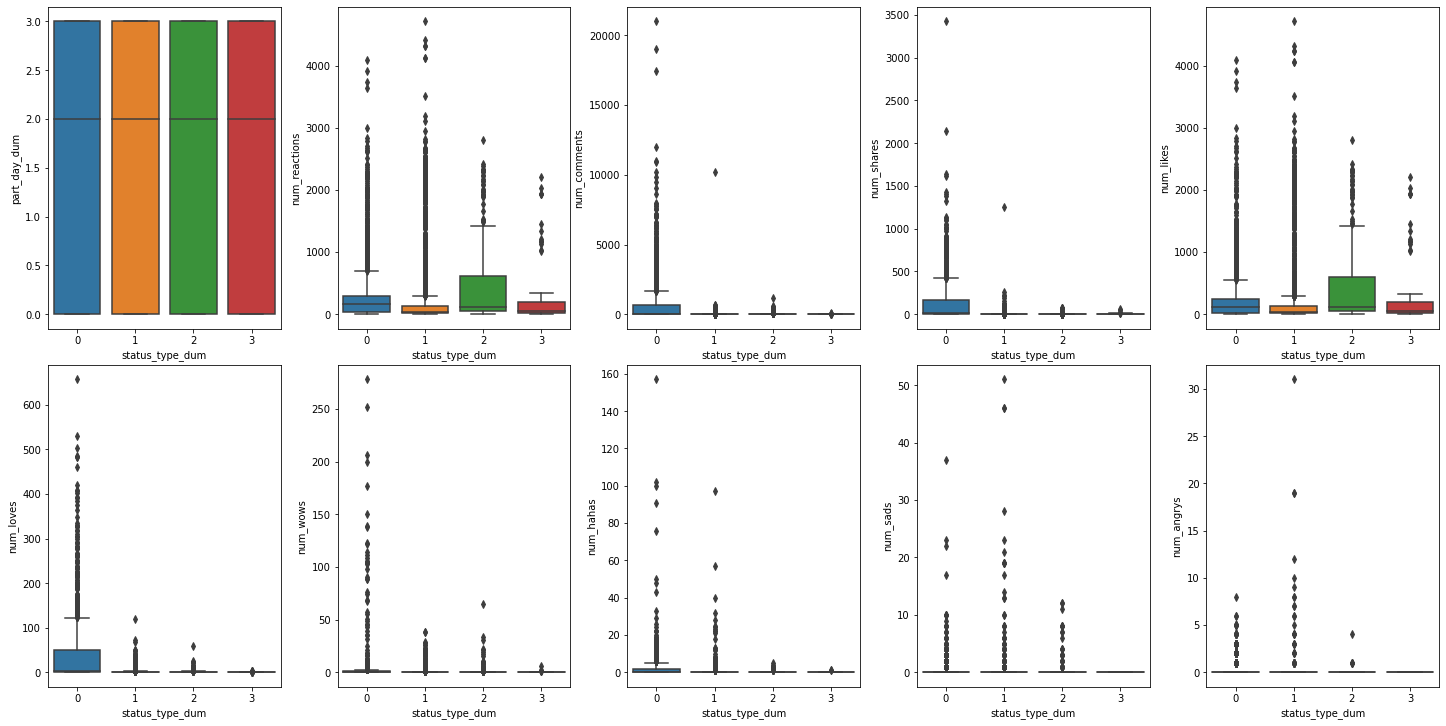

In [40]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
ax = ax.flatten()
index=0
for i in seleccion_númericas.columns:
  if i != 'status_type_dum':
    sns.boxplot(x='status_type_dum', y=i, data= seleccion_númericas, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show;

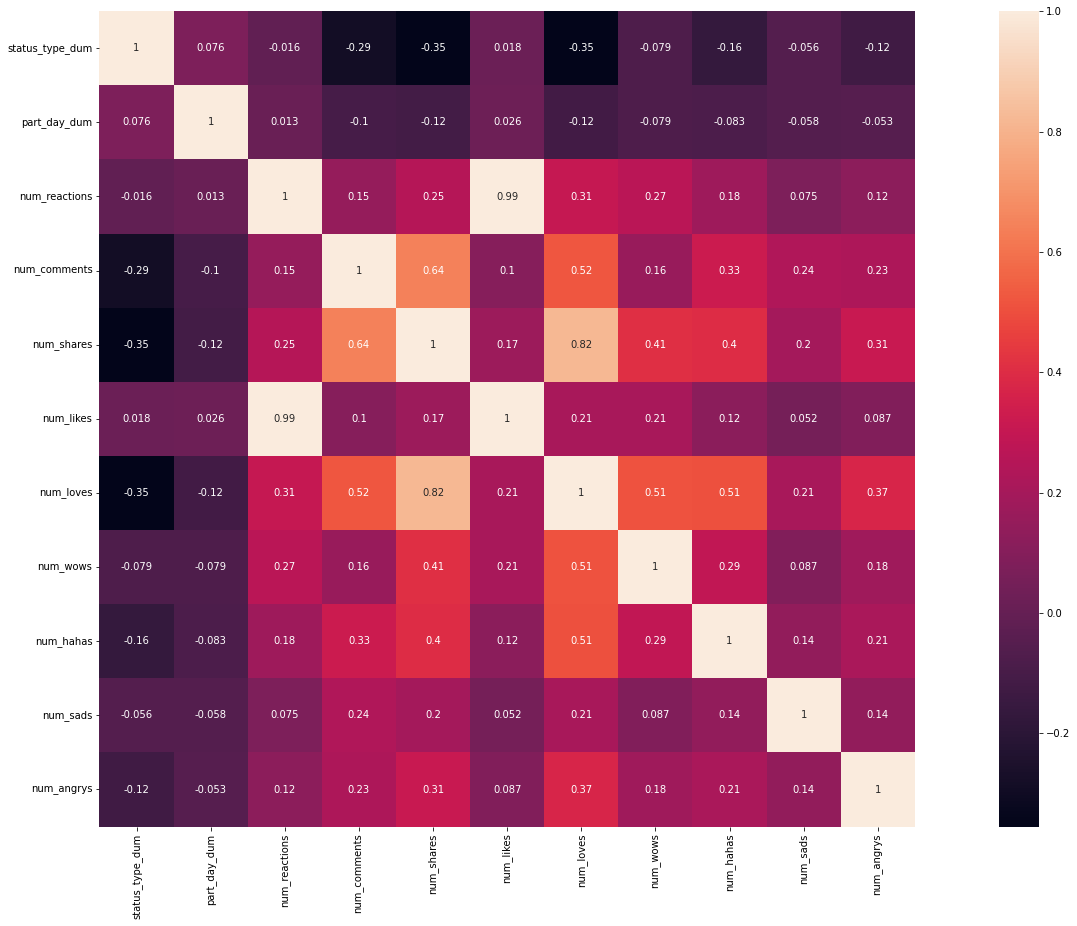

Correlación de diferentes características de nuestro conjunto de datos con status_type_dum:
status_type_dum : 1.0000
part_day_dum : 0.0765
num_reactions : -0.0158
num_comments : -0.2889
num_shares : -0.3547
num_likes : 0.0185
num_loves : -0.3531
num_wows : -0.0793
num_hahas : -0.1649
num_sads : -0.0564
num_angrys : -0.1238


In [41]:
# Trazado de mapa de calor de correlación para verificar las declaraciones anteriores:
# ==============================================================================
from scipy.stats import pearsonr

plt.figure(figsize=(30, 15))
sns.heatmap(seleccion_númericas.corr(method='pearson'), annot=True, square=True)
plt.show()

print('Correlación de diferentes características de nuestro conjunto de datos con status_type_dum:')
for i in seleccion_númericas.columns:
  corr, _ = pearsonr(seleccion_númericas[i], seleccion_númericas['status_type_dum'])
  print('%s : %.4f' %(i,corr))

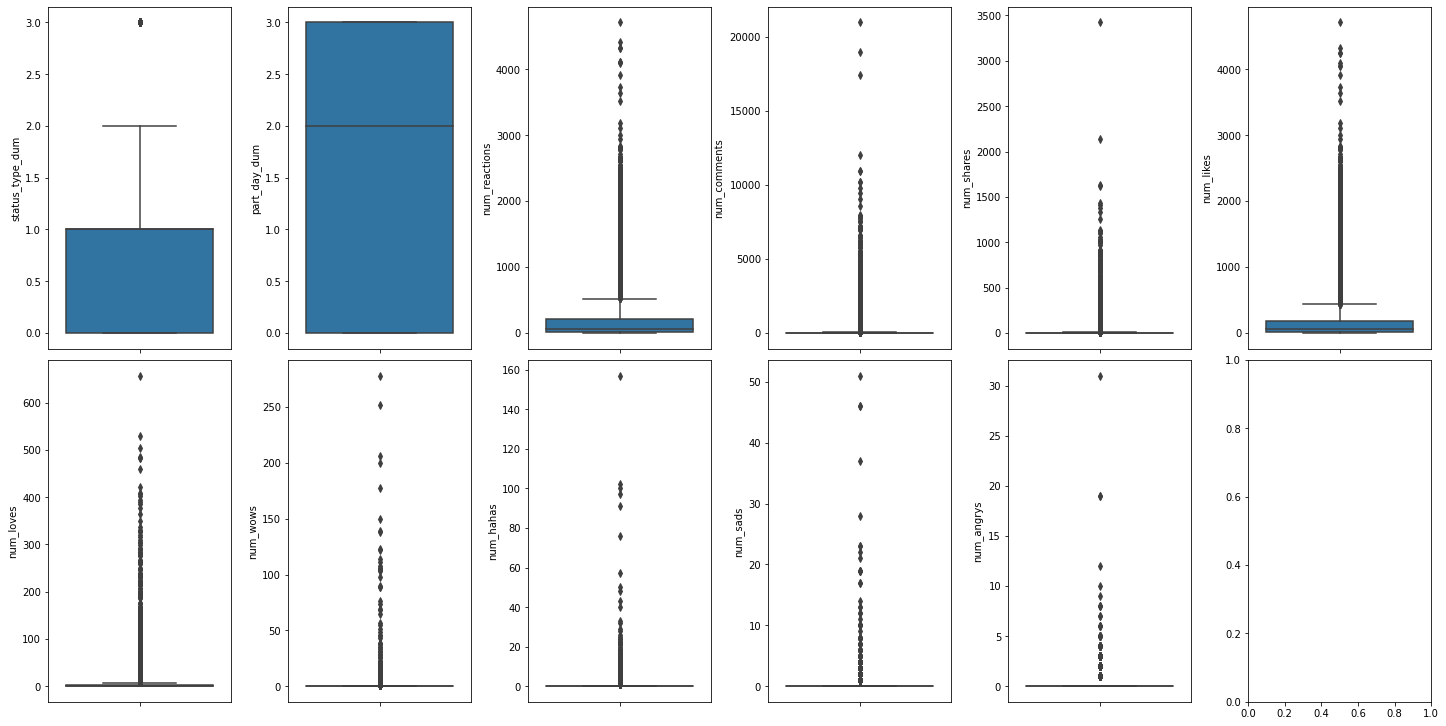

In [42]:
# Trazar diagramas de caja para ver si hay valores atípicos en nuestros datos (considerando los datos entre los percentiles 25 y 75 como no atípicos):
# ==============================================================================
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
ax = ax.flatten()
index = 0
for i in seleccion_númericas.columns:
  if i != 'quality':
    sns.boxplot(y=i, data= seleccion_númericas, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

Observamos que la mayoría de los atributos presentan valores atípicos.

In [43]:
# comprobación del porcentaje/cantidad de valores atípicos:
# ==============================================================================
for i in seleccion_númericas.columns:
  seleccion_númericas.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(seleccion_númericas[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = seleccion_númericas[i][(seleccion_númericas[i] < lower_bound) | (seleccion_númericas[i] > upper_bound)] #creando una serie de datos atípicos
  perc = (outlier_data.count()/seleccion_númericas[i].count())*100
  print('Los valores atípicos en %s son %.2f%% con recuento %.f' %(i, perc, outlier_data.count()))

Los valores atípicos en status_type_dum son 0.89% con recuento 63
Los valores atípicos en part_day_dum son 0.00% con recuento 0
Los valores atípicos en num_reactions son 10.00% con recuento 705
Los valores atípicos en num_comments son 19.49% con recuento 1374
Los valores atípicos en num_shares son 19.76% con recuento 1393
Los valores atípicos en num_likes son 10.98% con recuento 774
Los valores atípicos en num_loves son 18.77% con recuento 1323
Los valores atípicos en num_wows son 24.71% con recuento 1742
Los valores atípicos en num_hahas son 16.09% con recuento 1134
Los valores atípicos en num_sads son 8.61% con recuento 607
Los valores atípicos en num_angrys son 6.00% con recuento 423


In [44]:
# Número de valores únicos en cada una de las características:
# ==============================================================================
for col in df_F_TLD.columns.values:
  print ("Número de valores únicos de {} : {}".format(col, df_F_TLD[col] .nunique()))

Número de valores únicos de status_type : 4
Número de valores únicos de status_type_dum : 4
Número de valores únicos de part_day : 4
Número de valores únicos de part_day_dum : 4
Número de valores únicos de publication_date : 6913
Número de valores únicos de month : 12
Número de valores únicos de year : 7
Número de valores únicos de hour : 1050
Número de valores únicos de num_reactions : 1067
Número de valores únicos de num_comments : 993
Número de valores únicos de num_shares : 501
Número de valores únicos de num_likes : 1044
Número de valores únicos de num_loves : 229
Número de valores únicos de num_wows : 65
Número de valores únicos de num_hahas : 42
Número de valores únicos de num_sads : 24
Número de valores únicos de num_angrys : 14
Número de valores únicos de status_id : 6997


# Insights

* Variable **status_type_dum** es categórica.
* Variable **status_id ** con datos duplicados
* normalizar los datos atípicos presentes en la mayoría de atributos.

# Limpieza de Datos

In [45]:
my_df = df_F_TLD.copy()
df_processed = (my_df)

In [46]:
# borramos los registros duplicados:
# ==============================================================================
df_processed = df_F_TLD.drop_duplicates(subset = ['status_id'], ignore_index=True)

In [47]:
# Para las variables con outliers hacemos un RobustScaler:
# ==============================================================================
from sklearn.preprocessing import RobustScaler

variablesRbSc = ['status_type_dum','num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
                'num_angrys']
rs = RobustScaler()
df_processed[variablesRbSc] = rs.fit_transform(df_processed[variablesRbSc])

In [48]:
# Preprocesado de las variables numéricas con MinMaxScaler
# El algotirmo K-Means se basa en el cálculo de distancias y necesita tener todas las variables en la misma escala para ser válido:
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler

variables_num = seleccion_númericas.columns

mms = MinMaxScaler(feature_range=(0, 1))
df_processed[variables_num] = mms.fit_transform(df_processed[variables_num])

In [49]:
# Datos originales:
# ==============================================================================
df_F_TLD.shape

(7050, 18)

In [50]:
# Datos Procesados:
# ==============================================================================
df_processed.shape

(6997, 18)

Se han eliminado 53 observaciones con datos duplicados.

# Visualización de los Atributos antes y después del preprocesado:

Comprobamos que el preprocesado se ha realizado correctamente:

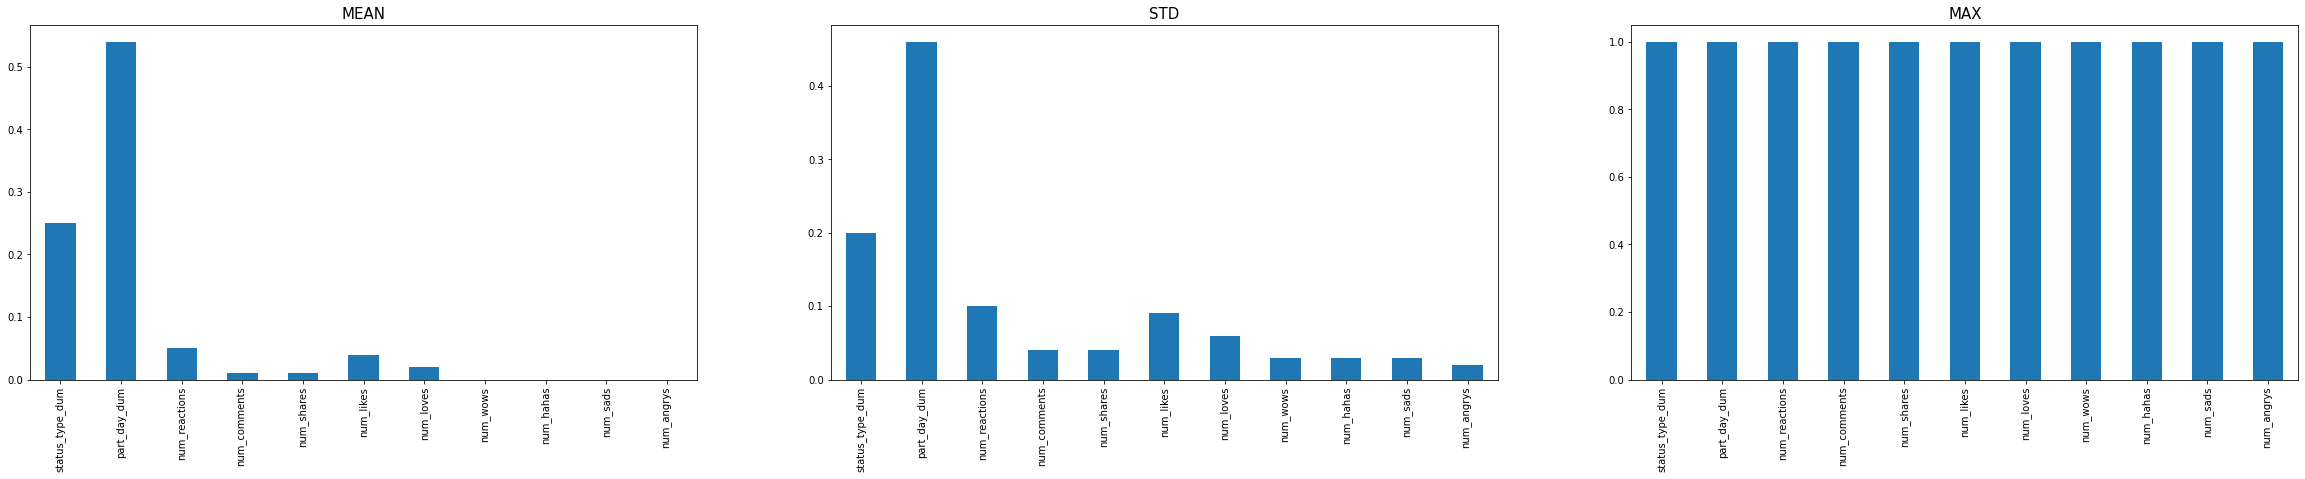

In [51]:
# Trazar la media y el valor máximo de los atributos nùmericos:
# ==============================================================================
data_desc = df_processed.describe().round(2)

plt.figure(figsize=(55,30))
plt.subplot(4,4,1)
data_desc.loc['mean'].plot.bar()
plt.title('MEAN', fontsize = 15);

plt.subplot(4,4,2)
data_desc.loc['std'].plot.bar()
plt.title('STD', fontsize = 15);

plt.subplot(4,4,3)
data_desc.loc['max'].plot.bar()
plt.title('MAX', fontsize = 15);

Como se observa, se han normalizado mejor los datos.

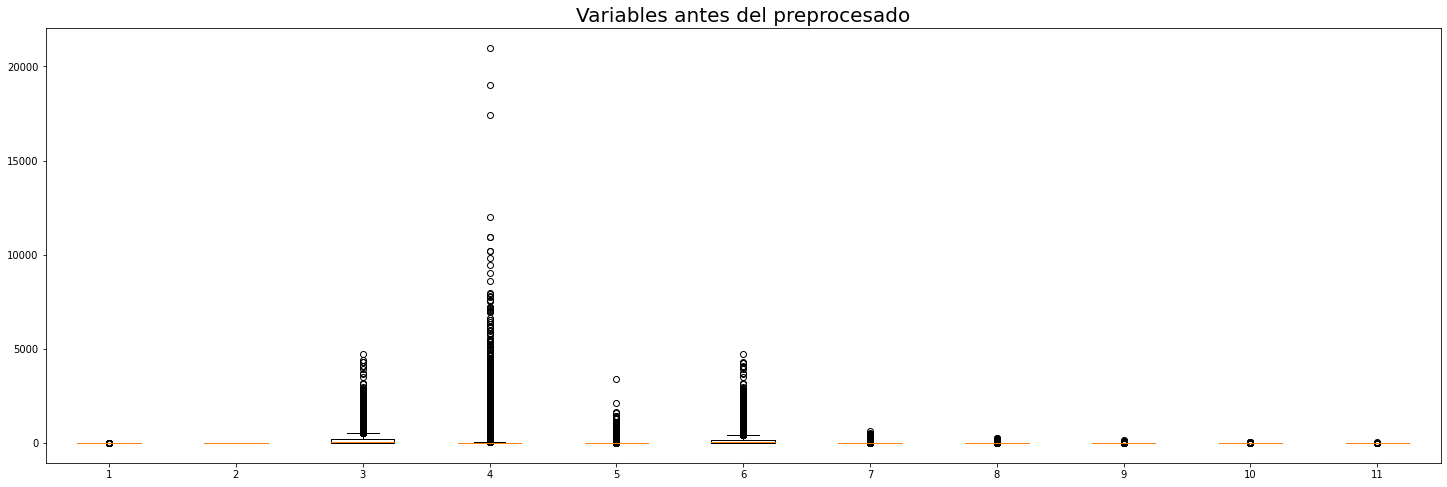

In [52]:
datos_graf = datos_grafFS = [df_F_TLD['status_type_dum'],df_F_TLD['part_day_dum'],df_F_TLD['num_reactions'],df_F_TLD['num_comments'],
                             df_F_TLD['num_shares'],df_F_TLD['num_likes'],df_F_TLD['num_loves'],df_F_TLD['num_wows'],
                             df_F_TLD['num_hahas'],df_F_TLD['num_sads'],df_F_TLD['num_angrys']]
fig = plt.figure(1, figsize=(25, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(datos_graf)
ax.set_title("Variables antes del preprocesado", fontsize = 20);

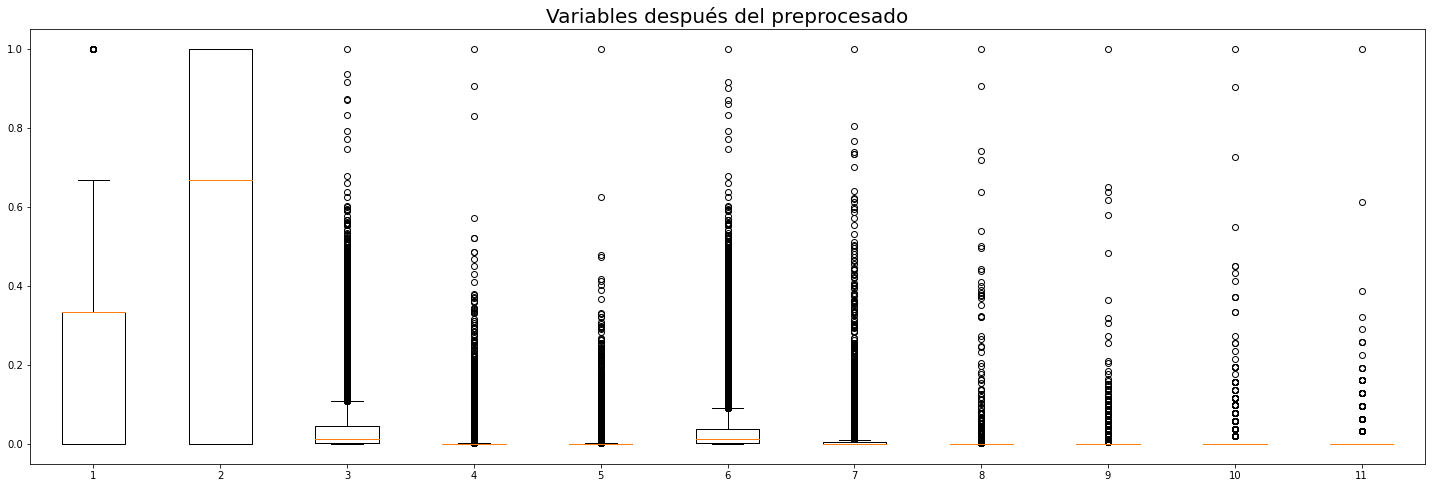

In [53]:
datos_graf = datos_grafFS = [df_processed['status_type_dum'],df_processed['part_day_dum'],df_processed['num_reactions'],df_processed['num_comments'],
                             df_processed['num_shares'],df_processed['num_likes'],df_processed['num_loves'],df_processed['num_wows'],
                             df_processed['num_hahas'],df_processed['num_sads'],df_processed['num_angrys']]
fig = plt.figure(1, figsize=(25, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(datos_graf)
ax.set_title("Variables después del preprocesado", fontsize = 20);

# Ejercicio 1:

Descarga el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilizando el algoritmo de K-means.

# Clasificación de los registros utilizando el algoritmo de K-Means.

K-Means es un algoritmo de apredizaje no supervisado de agrupamiento, construye grupos de datos sin etiquetas previas dividiendo los registros en 'k' grupos en función de la distacia de cada registro a los centroides y minimiza la suma de los cuadrados de estas distancias en cada grupo.

**El objetivo de trabajar con este algoritmo de agrupación es encontrar patrones y extraer conclusiones sobre el motivo de estas agrupaciones.**




In [54]:
# Vamos a hacer una nueva variable que represente todas las reacciones que suscita una publicación juntas para simplificar el estudio:
# ==============================================================================

df_processed['num_interacciones'] = df_processed['num_shares'] + df_processed['num_comments'] + df_processed['num_reactions']

## Análisis de componentes principales PCA.


Técnica para reducir dimensiones reteniendo toda la información posible.

In [55]:
from sklearn.decomposition import PCA
variables_num = [df_processed['status_type_dum'], df_processed['part_day_dum'], df_processed['num_interacciones'], df_processed['num_reactions'], 
                 df_processed['num_comments'], df_processed['num_shares']]

In [56]:
pca = PCA(random_state=0)

In [57]:
calculo_pca = pca.fit_transform(variables_num)

In [58]:
PC_components = np.arange(pca.n_components_) + 1
print(PC_components)

[1 2 3 4 5 6]


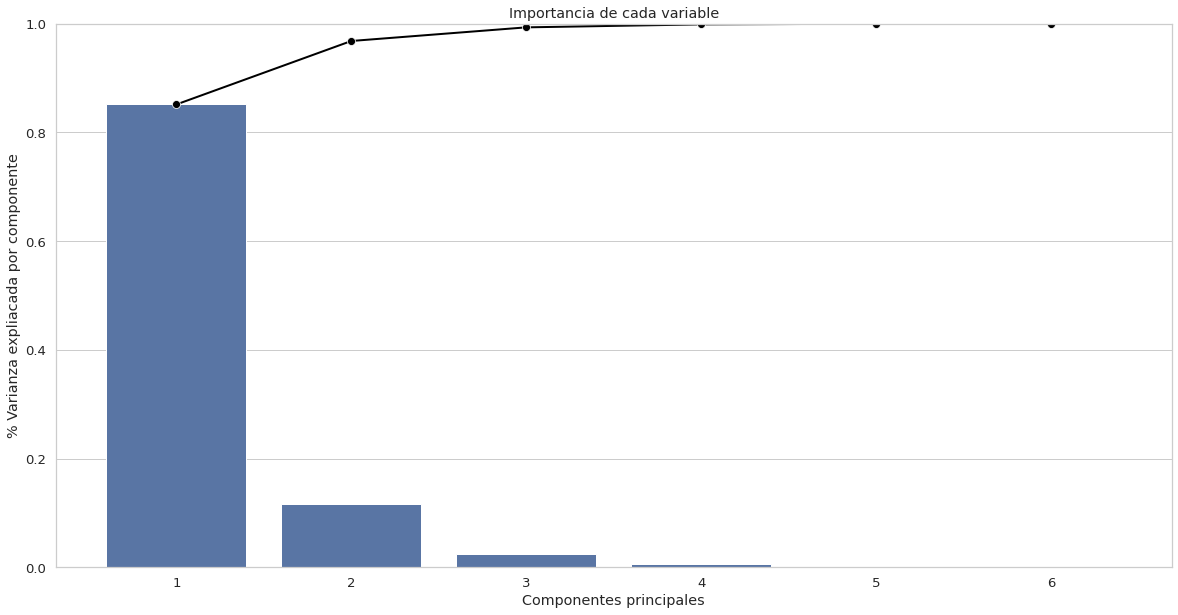

In [59]:
calculo_pca = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(20, 10))
calculo_pca = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
calculo_pca = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Importancia de cada variable')
plt.xlabel('Componentes principales')
plt.ylabel('% Varianza expliacada por componente')
plt.ylim(0, 1);

In [60]:
print(pca.explained_variance_ratio_)

[8.51462122e-01 1.16743437e-01 2.50700587e-02 5.43320396e-03
 1.29117868e-03 3.13596075e-32]


Con las dos primeras variables explicamos más de un 98% de los datos, sólo usaremos estas variables 'status_type_dum', 'part_day_dum', para trabajar con los algoritmos.

# Técnica de Elbow.

* El objetivo del algoritmo K_Means es encontrar las mejores agrupaciones para los datos dados.

* El tipo de distancia con el que vamos a trabajar nuestro modelo es **WSS 'within-sum-of-squares'**, definida como la distacia de cada integrante del grupo y su centroid.

* **WSS** se calcula para cada número de agrupaciones, obtenemos el valor K, que es el menor valor de WSS, y se representa en la gráfica.

In [61]:
# hacemos un subdaset con las variables obtenidas en el análisis PCA:
# ==============================================================================

df_PCA = df_processed[['status_type_dum', 'part_day_dum']].copy()
df_PCA

,status_type_dum,part_day_dum
0,0.333333,1.000000
1,0.333333,1.000000
2,0.333333,1.000000
3,0.333333,1.000000
4,0.333333,1.000000
...,...,...
6992,0.333333,0.666667
6993,0.333333,0.666667
6994,0.000000,1.000000
6995,0.000000,1.000000


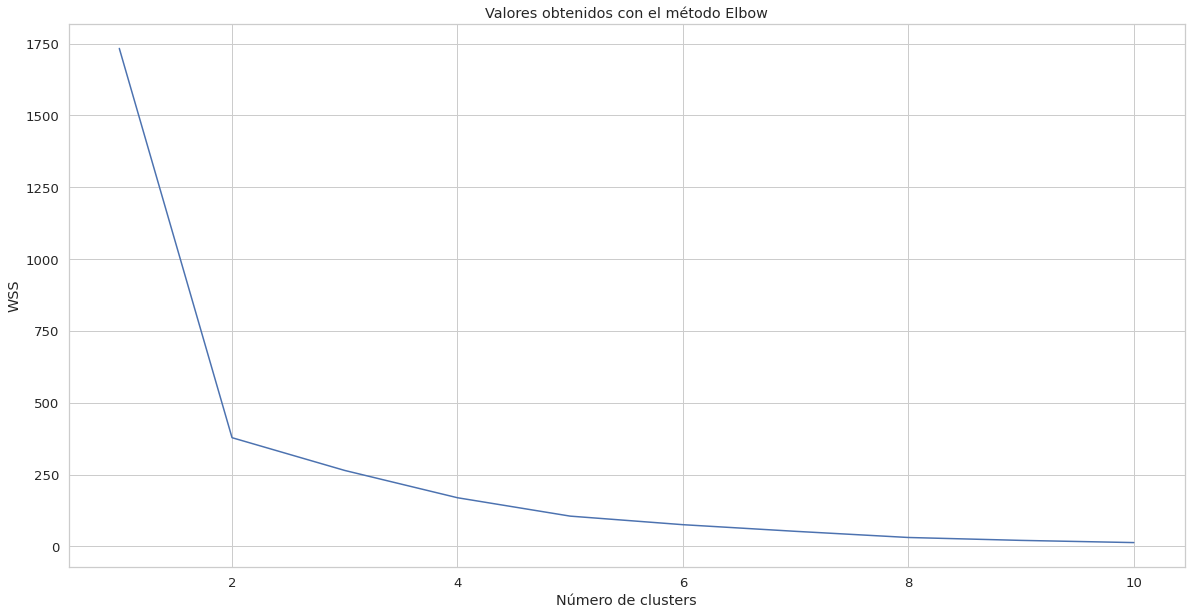

In [62]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(figsize=(20, 10))
wcss = []  # creamos una lista para almacenar los valores que nos devuelva el modelo con cada grupo de nodos
for i in range(1,11):  # probamos el modelo con con un nodo y vamos aumentando hasta 10 nodos
    kmeans = KMeans(n_clusters=i, random_state= 0)  
    kmeans.fit(df_PCA)  
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss)  
plt.title('Valores obtenidos con el método Elbow')  
plt.xlabel('Número de clusters')  
plt.ylabel('WSS');

Con la gráfica que obtenemos tomamos un número de clusters de cinco.

# Algoritmo K-Means con 5 clusters.

In [63]:
clustering_5 = KMeans(n_clusters=5, random_state=0)
clustering_5.fit(df_PCA)

KMeans(n_clusters=5, random_state=0)

In [64]:
y_pred_5 = clustering_5.fit_predict(df_PCA)
df_processed['cluster_KMeans_5'] = y_pred_5  # aquí tenemos nuestro dataframe con los grupos para poder representarlo gráficamente

# Ejercicio 2:

**Clasifica los distintos registros utilizando el algoritmo de clustering jerárquico.**

Los algotirmos de agrupamiento jerárquico agrupan objetos en grupos llamados clusters, pueden ser de dos tipos:

- **Aglomerativos:**  inicialmente hay muchos clústeres pequeños, se mezclan y crean un grupo mayor en jerarquía.

- **Divisivas:**  la primera observación es un sólo grupo, se van realizando divisiones y estos grupos bajan en la jerarquía.

Los algoritmos de agrupamiento jerárquico no necesitan un número dado de clusters y son lentos con grandes volúmenes de datos.

Los algoritmos de agrupamiento jerárquico teienen diferetes métodos de medir las distancias. En este jercicico usaremos el método Ward, la distancias entre clústeres es la suma del cuadrado de las diferencias dentro de todos los clústeres.

In [65]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [66]:
clustering_agg_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering_agg_2.fit(df_PCA)
labels_2 = clustering_agg_2.labels_
df_processed['cluster_jer_2'] = labels_2

# Ejercicio 3:

**Calcula el rendimiento del clustering mediante un parámetro como puede ser silueta.**

El índice de rendimiento **Silhouette** se usa para evaluar la calidad de los clústeres obtenidos con los algoritmos de agrupación.

Se calcula la distancia entre cada muestra y todos los demás puntos de cada cluster, después se calcula media y se obtiene la distancia media.

El valor del índice Silhouette está entre -1 y 1. El cluster es denso y está bien diferenciado cuando el índice se acerca a 1, si se acerca a 0 hay clústeres sobrepuestos y las muestras están muy cerca de los límites con otros clústeres. 

Si el valor es -1 indica que hay muestras asignadas a clústeres incorrectos.

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestCentroid

# Calculamos el rendimiento del clustering hecho con KMeans.

Silhouetter Score 2 clusters: 0.716
Silhouetter Score 3 clusters: 0.674
Silhouetter Score 4 clusters: 0.710
Silhouetter Score 5 clusters: 0.809
Silhouetter Score 6 clusters: 0.850
Silhouetter Score 7 clusters: 0.902
Silhouetter Score 8 clusters: 0.930
Silhouetter Score 9 clusters: 0.955


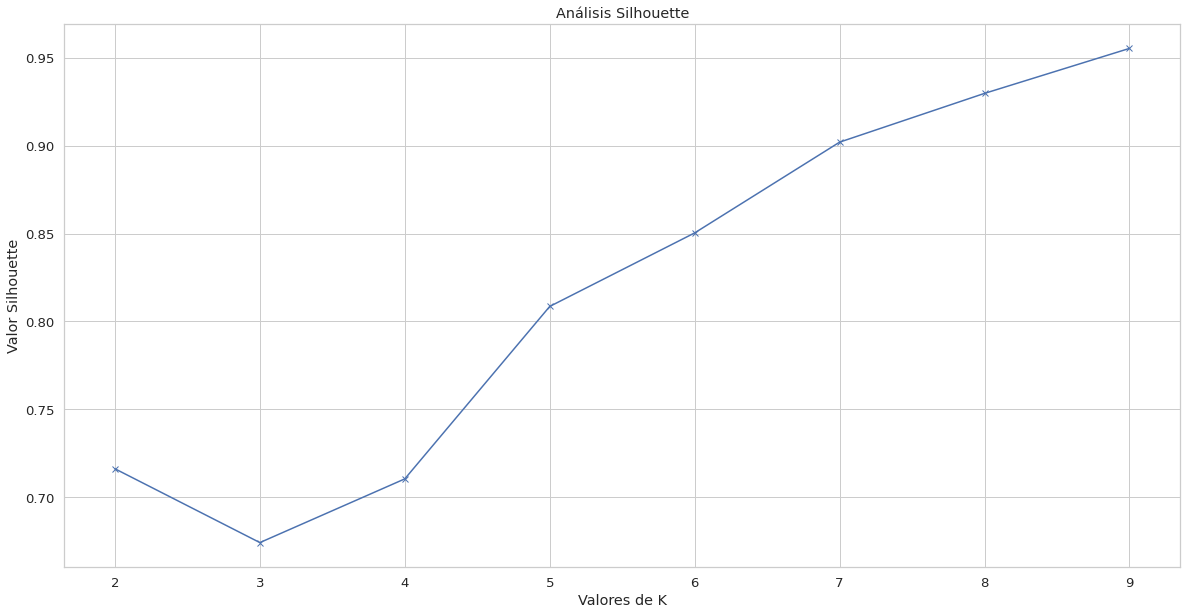

In [68]:
fig, ax = plt.subplots(figsize=(20, 10))
rango_k_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in rango_k_clusters:
 
 kmeans = KMeans(n_clusters=num_clusters, random_state=0)
 kmeans.fit(df_PCA)
 cluster_labels = kmeans.labels_
 
 silhouette_avg.append(silhouette_score(df_PCA, cluster_labels, metric='euclidean'))
 print(f'Silhouetter Score {num_clusters} clusters: %.3f' % silhouette_avg[num_clusters-2])

plt.plot(rango_k_clusters,silhouette_avg,'bx-')
plt.xlabel('Valores de K') 
plt.ylabel('Valor Silhouette') 
plt.title('Análisis Silhouette');

# Representación gráfica de los clústeres con Silhouette.

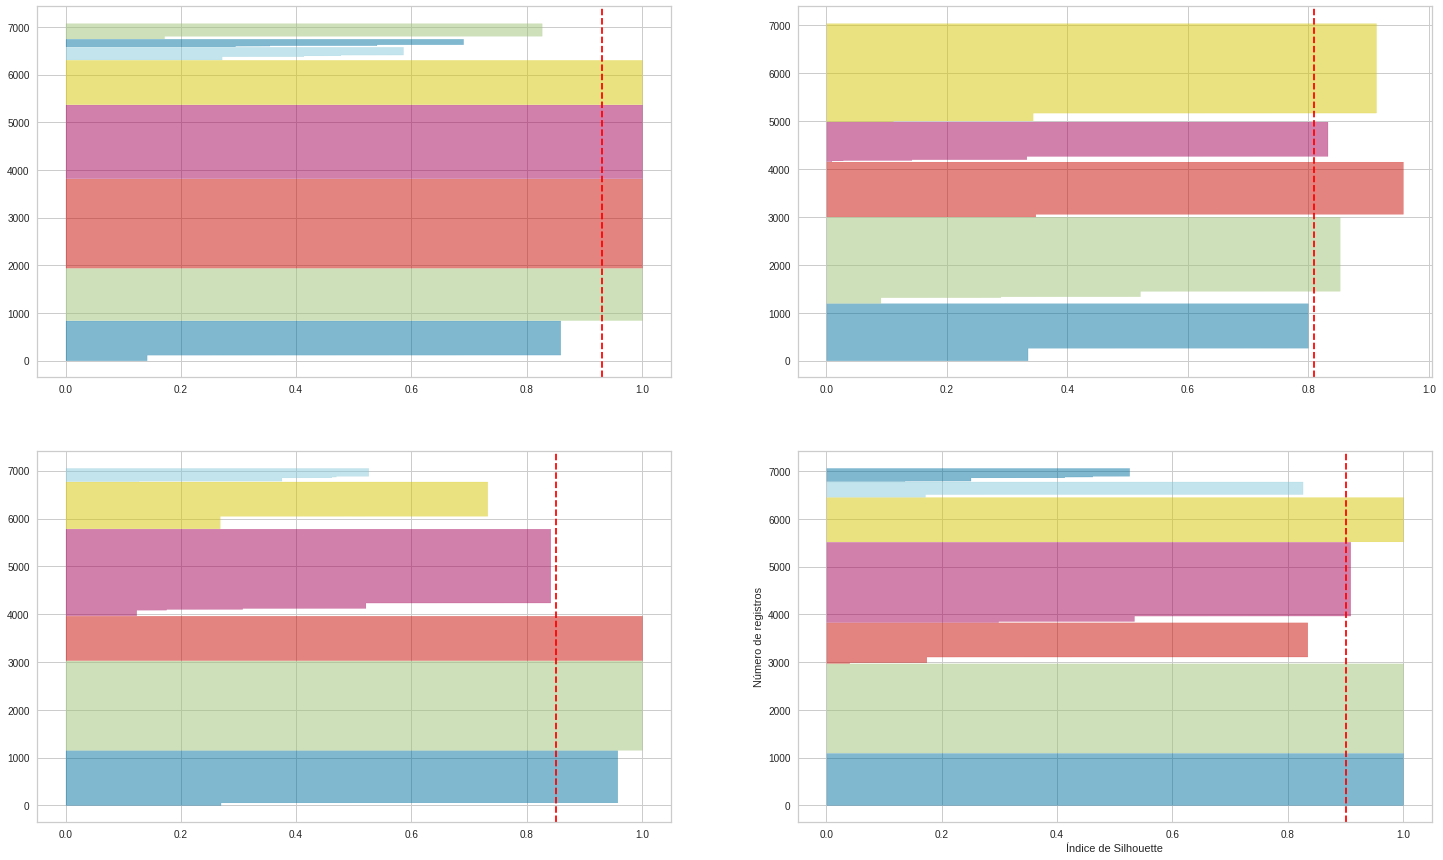

In [69]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(25,15))
for i in [5,6,7,8]:  # número de clusters
    plt.xlabel('Índice de Silhouette')
    plt.ylabel('Número de registros')
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-4][mod])
    visualizer.fit(df_PCA)

Observamos en las gráficas que la única distribución que tiene los volúmenes de los clústeres equilibrados y que todos llegan al score marcado es la distribución de cinco clústeres a pesar de tener el menor score. Coindide además con el número obtenido con el método Elbow, así que trabajaremos con cinco clústeres.

# Calculamos el rendimiento de la agrupación hecha con AgglomerativeClustering.

Silhouetter Score 2 clusters: 0.697
Silhouetter Score 3 clusters: 0.607
Silhouetter Score 4 clusters: 0.722
Silhouetter Score 5 clusters: 0.800
Silhouetter Score 6 clusters: 0.847
Silhouetter Score 7 clusters: 0.876
Silhouetter Score 8 clusters: 0.929
Silhouetter Score 9 clusters: 0.961


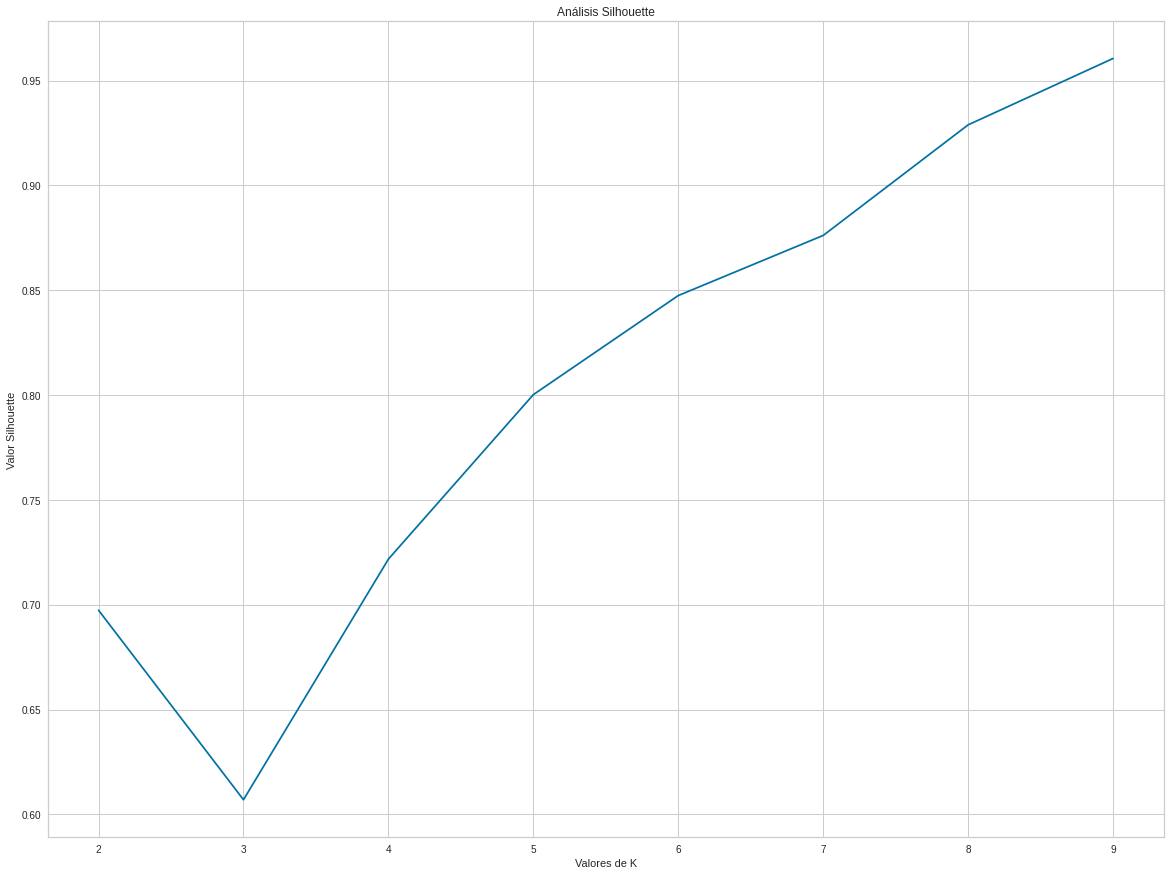

In [70]:
fig, ax = plt.subplots(figsize=(20,15))
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range_n_clusters:
    cluster_agg_n = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
    cluster_agg_n.fit(df_PCA)
    cluster_labels = cluster_agg_n.labels_
  
    silhouette_avg.append(silhouette_score(df_PCA, cluster_labels, metric='euclidean'))
    print(f'Silhouetter Score {num_clusters} clusters: %.3f' % silhouette_avg[num_clusters-2])
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Valores de K') 
plt.ylabel('Valor Silhouette') 
plt.title('Análisis Silhouette');

### Trasformamos la variable númerica ordinal 'cluster_KMeans_5' a categórica para facilitarnos las gráficas.

In [71]:
df_processed['cluster'] = df_processed['cluster_KMeans_5'].map({0:'cluster_1', 1:'cluster_2', 2:'cluster_3', 3:'cluster_4', 4:'cluster_5'})

# Análisis de los datos y conclusiones con los clusteres definitivos.

**Distribución de registros por clústeres.**

In [72]:
df_processed['cluster'].value_counts()

cluster_5    2045
cluster_2    1794
cluster_1    1189
cluster_3    1144
cluster_4     825
Name: cluster, dtype: int64

**El algoritmo K-Means ha clasificado los registros en cinco clúteres de volúmenes parecidos, el mayor contiene 2045 registros y el menor 825.**

# Distribución de tipos de interacción por cluster.

In [73]:
df_processed.groupby(by='cluster')['status_type'].value_counts()

cluster    status_type
cluster_1  video          1189
cluster_2  photo          1661
           status          113
           link             20
cluster_3  video          1144
cluster_4  photo           715
           status           84
           link             26
cluster_5  photo          1866
           status          162
           link             17
Name: status_type, dtype: int64

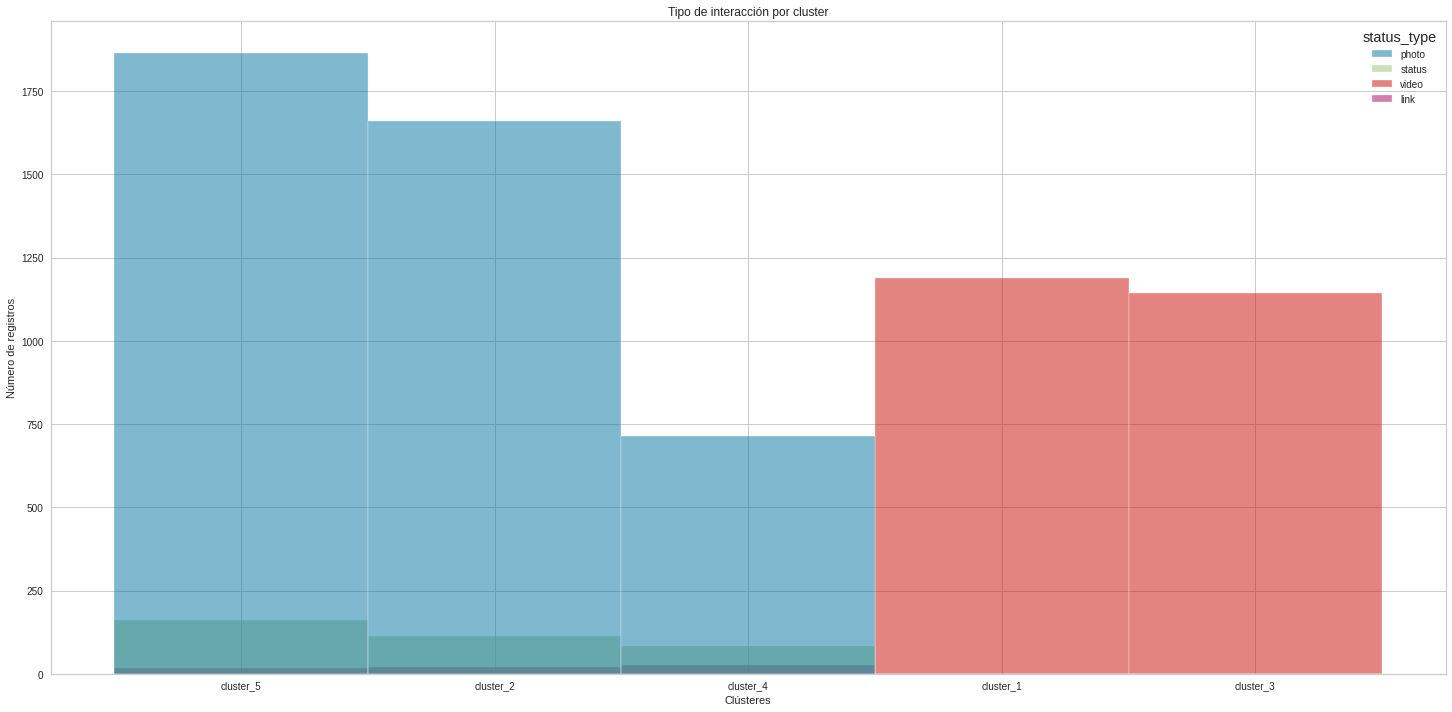

In [74]:
fig, ax = plt.subplots(figsize=(25, 12))
sns.histplot(x=df_processed['cluster'], hue= df_processed['status_type'])
plt.xlabel('Clústeres')
plt.ylabel('Número de registros')
plt.title('Tipo de interacción por cluster');

Los clúteres se dividen claramente en cluster de foto, tres de ellos, y cluster de vídeo, los otros dos.

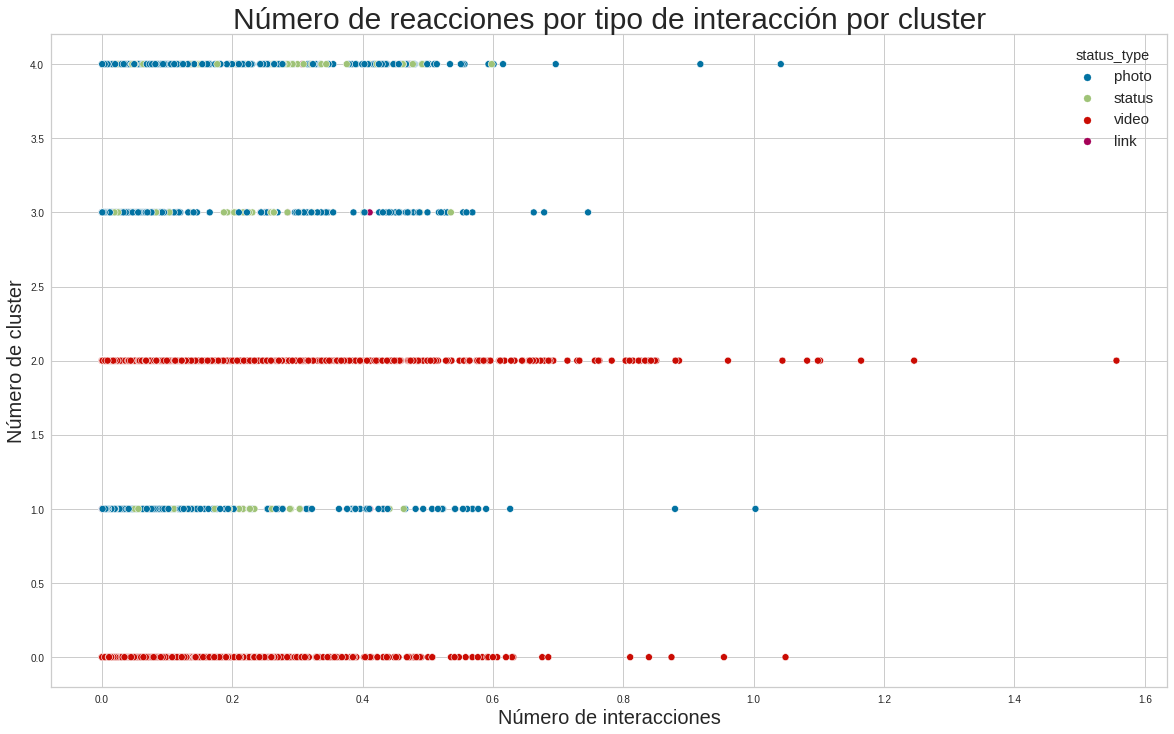

In [75]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df_processed['num_interacciones'], y= df_processed['cluster_KMeans_5'], hue= df_processed['status_type'])
plt.xlabel('Número de interacciones', fontsize = 20)
plt.ylabel('Número de cluster', fontsize = 20)
plt.title('Número de reacciones por tipo de interacción por cluster', fontsize = 30)
ax.legend(title='status_type', fontsize = 15);

Podemos ver que el cluster número tres (2 en la gráfica), de vídeo, tiene muchas más interacciones que el resto de clúteres, seguido por el número 1 (0 en la gráfica), también de vídeo.

# Distribución de periodos temporales por cluster.

In [76]:
df_processed.groupby(by='part_day')['status_type'].value_counts()

part_day          status_type
Madrugada 00-06h  photo          1866
                  video           927
                  status          162
                  link             17
Manaña 06-12h     photo          1543
                  video          1089
                  status          113
                  link             20
Noche 20-00h      photo           715
                  video           262
                  status           68
                  link             17
Tarde 12-20h      photo           118
                  video            55
                  status           16
                  link              9
Name: status_type, dtype: int64

In [77]:
df_processed.groupby(by='cluster')['part_day'].value_counts()

cluster    part_day        
cluster_1  Madrugada 00-06h     927
           Noche 20-00h         262
cluster_2  Manaña 06-12h       1676
           Tarde 12-20h         118
cluster_3  Manaña 06-12h       1089
           Tarde 12-20h          55
cluster_4  Noche 20-00h         800
           Tarde 12-20h          25
cluster_5  Madrugada 00-06h    2045
Name: part_day, dtype: int64

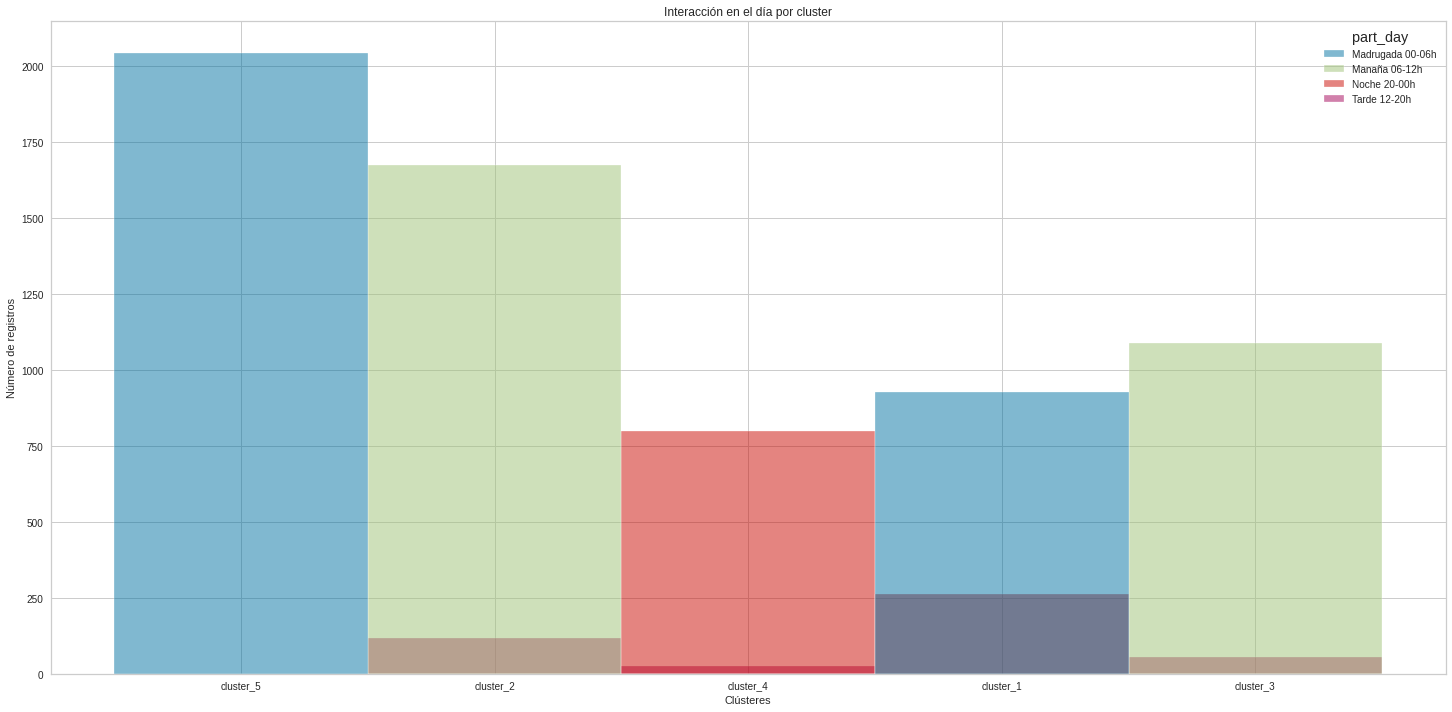

In [78]:
fig, ax = plt.subplots(figsize=(25, 12))
sns.histplot(x=df_processed['cluster'], hue= df_processed['part_day'])
plt.xlabel('Clústeres')
plt.ylabel('Número de registros')
plt.title('Interacción en el día por cluster');

En la gráfica se ve cómo cada cluster tiene predominancia en una parte del día. Tenemos dos clústeres mayoritariamente de madrugada, dos de mañana y un quinto de noche.

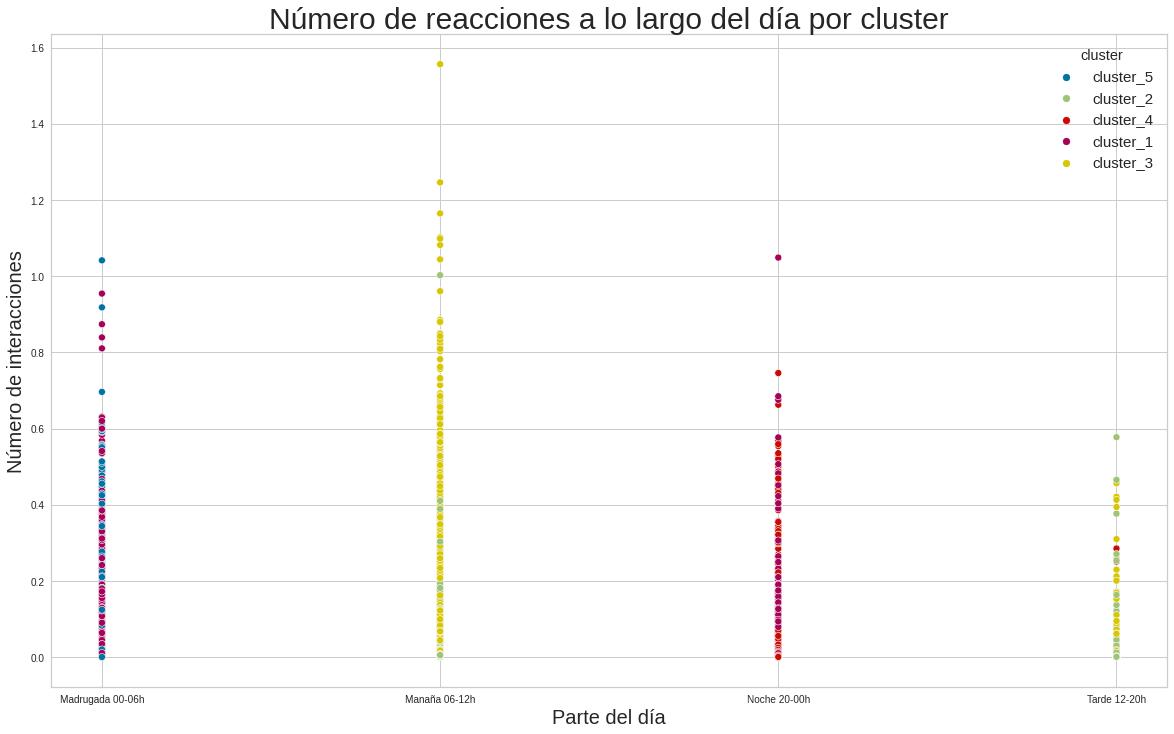

In [79]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df_processed['part_day'], y= df_processed['num_interacciones'], hue= df_processed['cluster'])
plt.xlabel('Parte del día', fontsize = 20)
plt.ylabel('Número de interacciones', fontsize = 20)
plt.title('Número de reacciones a lo largo del día por cluster', fontsize = 30)
ax.legend(title='cluster', fontsize = 15);

Observamos que el cluster 3,es el que tiene más interacciones por la mañana y a la vez el que menos tiene por la tarde, junto con el cluster 2 que es de tarde también.

# Conclusiones.

Los cinco clústeres generados por el aloritmo K-Means tienen las siguientes caracteríaticas:

- Cluster 1, tiene 1189 registros de usuarios que han compartido vídeos, 927 durante la madrugada y 262 por la noche. 

- Cluster 2, tiene 1793 registros de usuarios que han compartido fotos, 1660, status, 113, link 20, durante la mañana, 1675 y la tarde 118.

- Cluster 3, tiene 1144 registros de usuarios que han compartido vídeos, 1089 durante la mañana y 55 por la tarde.  

- Cluster 4, tiene 825 registros de usuarios que han compartido fotos, 715, status, 84, link 26, durante la noche, 800 y la tarde 25.

- Cluster 5, tiene 2046 registros de usuarios que han compartido fotos, 1867, status, 162, link 17, durante la madrugada.

In [80]:
# Renombramos los clústeres con sus características:
# ==============================================================================

df_processed['cluster'] = df_processed['cluster_KMeans_5'].map({0:'cluster_1, vídeos-madrugada-noche', 1:'cluster_2, fotos-mañana-tarde',
                                                        2:'cluster_3, vídeos-mañana', 3:'cluster_4, fotos-noche', 4:'cluster_5, fotos-madrugada'})

In [81]:
df_processed['cluster'].unique()

array(['cluster_5, fotos-madrugada', 'cluster_2, fotos-mañana-tarde',
       'cluster_4, fotos-noche', 'cluster_1, vídeos-madrugada-noche',
       'cluster_3, vídeos-mañana'], dtype=object)

# Actividades de nuestros registros según los clústeres.

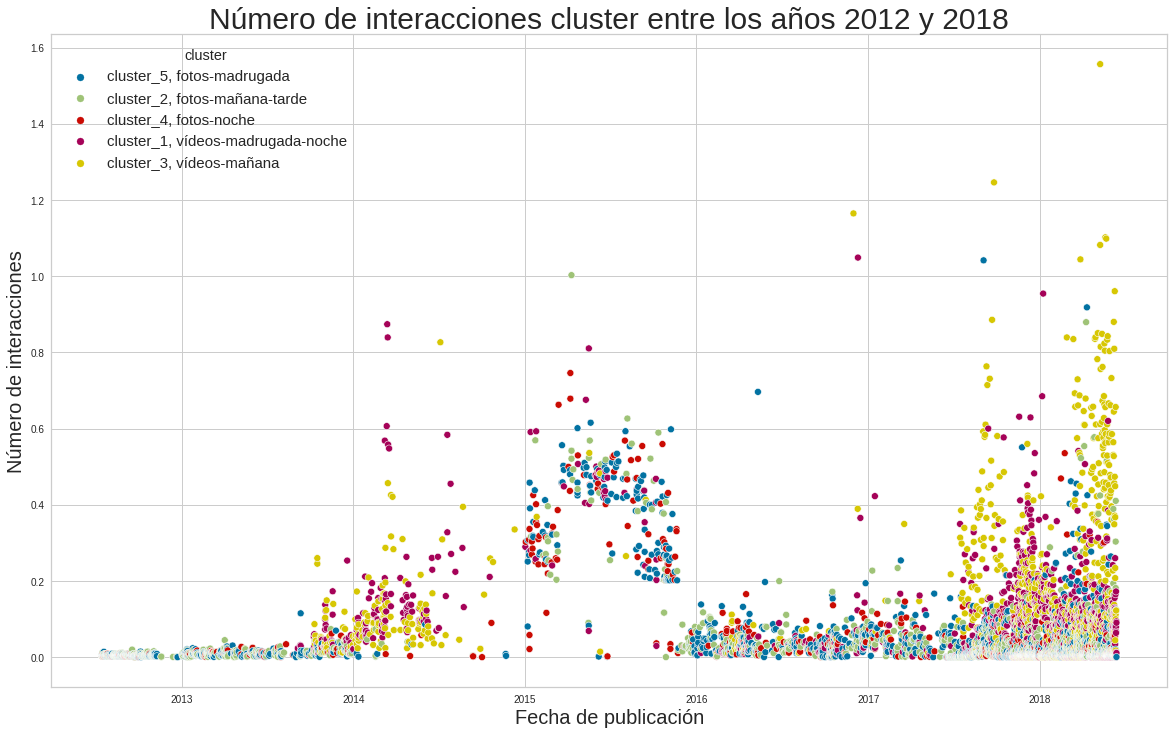

In [82]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.scatterplot(x=df_processed['publication_date'], y= df_processed['num_interacciones'], hue= df_processed['cluster'])
plt.xlabel('Fecha de publicación', fontsize = 20)
plt.ylabel('Número de interacciones', fontsize = 20)
plt.title('Número de interacciones cluster entre los años 2012 y 2018', fontsize = 30)
ax.legend(title='cluster', fontsize = 15);

**Facebook refleja con la viralidad en las fotos y vídeos los eventos más importantes, como eventos polítivos o atentados.**


## Podemos ver el la gráfica:

- el golpe de estado de 2014, 
https://es.wikipedia.org/wiki/Golpe_de_Estado_en_Tailandia_de_2014

- atentado en 2015, 
https://www.dw.com/es/tailandia-en-estado-de-shock/a-18656389

- nueva constitución en el 2017,
https://www.dw.com/es/nueva-constituci%C3%B3n-en-tailandia-y-v%C3%ADa-libre-para-elecciones/a-38322205

- elecciones en 2018,  
https://www.rtve.es/noticias/20171010/tailandia-celebrara-elecciones-noviembre-2018/1627467.shtml


Observamos que los clústeres que mejor recogen esta viralidad son el número 1, vídeos durante la noche o madrugada y el número 3, vídeos por la mañana.